### BANK MARKETING-Term Deposit Prediction Model

#### Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

###### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

###### Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


###### About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

###### You are provided with following 2 files:

- **train.csv** : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
- **test.csv** : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


###### Dataset Attributes

Here is the description of all the variables:
- Variable: Definition
- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day_of_week: Day of week of contact
- duration: Contact duration
- campaign: number of contacts performed during this campaign to the client
- pdays: number of days that passed by after the client was last contacted
- previous: number of contacts performed before this campaign
- poutcome: outcome of the previous marketing campaign


###### Output variable (desired target):

- **Subscribed (target)**: has the client subscribed a term deposit? (YES/NO)

In [81]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [82]:
train = pd.read_csv('termdeposit_train.csv')
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [83]:
test = pd.read_csv('termdeposit_test.csv')
test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

- Both train and test dataset have categorical and numerical data

In [84]:
train.shape,test.shape

((31647, 18), (13564, 17))

- Train dataset have 31647 rows and 18 rows
- Test dataset has 13564 rows and 17 columns

In [85]:
print(train.columns)
print("\n")  
print(test.columns)

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


- We observe all the variables present in the train and test dataset

In [86]:
train.info()
print("\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


<class 'pandas.core.frame.DataFrame'>


- The dataset has dtypes: int64 and object

In [87]:
print('Train dataset:')
print(train.isnull().sum())
print('\n')
print('Test dataset:')
print(test.isnull().sum())

Train dataset:
ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


Test dataset:
ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


- The dataset has no null values

In [88]:
print('Train dataset:')
print(train.dtypes)
print('\n')
print('Test dataset:')
print(test.dtypes)

Train dataset:
ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object


Test dataset:
ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object


- Train and test dataset have int and object datatype

In [89]:
for i in train.columns:
    print(train[i].value_counts())
    print('\n')

ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120  

- We can observe summary of the distribution of unique values in each column. It helps to understand the frequency of different values within each feature in train dataset.

In [90]:
for i in test.columns:
    print(test[i].value_counts())
    print('\n')

ID
38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: count, Length: 13564, dtype: int64


age
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: count, Length: 75, dtype: int64


job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: count, dtype: int64


marital
married     8119
single      3868
divorced    1577
Name: count, dtype: int64


education
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: count, dtype: int64


default
no     13334
yes      230
Name: count, dtype: int64


balance
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 818

-  We can observe summary of the distribution of unique values in each column. It helps to understand the frequency of different values within each feature in train dataset.

In [91]:
cat_col = []
for i in train.dtypes.index:
    if train[i].dtypes == 'object':
        cat_col.append(i)
print("Categorical Columns: ", cat_col)
print('\n')

num_col = []
for i in train.dtypes.index:
    if train[i].dtypes != 'object':
        num_col.append(i)
print("Numerical Columns: ", num_col)

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


- We segrated the train dataset into categorical and numerical variables

In [92]:
blank_spaces = [column for column in train.columns if train[column].dtype == 'object' and train[column].str.strip().str.len().any()]

if blank_spaces:
    print("Columns with leading or trailing spaces:")
    print(blank_spaces)
else:
    print(" No columns have leading or trailing spaces:")

Columns with leading or trailing spaces:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [93]:
# Remove leading and trailing spaces from identified columns
for column in blank_spaces:
    train[column] = train[column].str.strip() 


In [94]:
# Confirm that there are no more leading or trailing spaces
has_spaces_after_cleaning = train.applymap(lambda x: isinstance(x, str) and x.strip() != x).any().any()

if has_spaces_after_cleaning:
    print("DataFrame still has leading or trailing spaces.")
else:
    print(" * Train Data does not have leading or trailing spaces after cleaning.")

 * Train Data does not have leading or trailing spaces after cleaning.


In [95]:
blank_spaces = [column for column in test.columns if test[column].dtype == 'object' and test[column].str.strip().str.len().any()]

if blank_spaces:
    print("Columns with leading or trailing spaces:")
    print(blank_spaces)
else:
    print(" No columns have leading or trailing spaces:")
    
    
# Remove leading and trailing spaces from identified columns
for column in blank_spaces:
    test[column] = test[column].str.strip() 

# Confirm that there are no more leading or trailing spaces
has_spaces_after_cleaning = test.applymap(lambda x: isinstance(x, str) and x.strip() != x).any().any()

if has_spaces_after_cleaning:
    print("DataFrame still has leading or trailing spaces.")
else:
    print('\n')
    print("* Test data does not have leading or trailing spaces after cleaning.")

Columns with leading or trailing spaces:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


* Test data does not have leading or trailing spaces after cleaning.


In [96]:
train.nunique().to_frame('No of unique values')

No of unique values
ID                        31647
age                          76
job                          12
marital                       3
education                     4
default                       2
balance                    6326
housing                       2
loan                          2
contact                       3
day                          31
month                        12
duration                   1454
campaign                     45
pdays                       509
previous                     38
poutcome                      4
subscribed                    2

In [97]:
test.nunique().to_frame('No of unique values')

No of unique values
ID                       13564
age                         75
job                         12
marital                      3
education                    4
default                      2
balance                   4292
housing                      2
loan                         2
contact                      3
day                         31
month                       12
duration                  1201
campaign                    40
pdays                      422
previous                    33
poutcome                     4

- Displays the number of unique values for each column in the  train and test DataFrame

In [98]:
train.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [99]:
test.describe()

ID           age       balance           day      duration  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128   1358.496535     15.738646    258.278679   
std    12994.043329     10.604108   3082.940623      8.288174    258.488648   
min        1.000000     18.000000  -3313.000000      1.000000      0.000000   
25%    11546.000000     33.000000     71.000000      8.000000    102.000000   
50%    22782.000000     39.000000    445.000000     16.000000    180.000000   
75%    33974.250000     48.000000   1413.250000     21.000000    319.000000   
max    45206.000000     95.000000  98417.000000     31.000000   3253.000000   

           campaign         pdays      previous  
count  13564.000000  13564.000000  13564.000000  
mean       2.759510     41.648555      0.594441  
std        3.060928    101.985178      1.998193  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       58.000000    850.000000     55.000000

## Descriptive Analysis of train-test dataset

- The age of clients ranges from 18 to 95, with an average around 41 years.
- The balance shows a wide range, with some clients having a negative balance and others having substantial amounts in their accounts.
- Duration of the last contact varies significantly, indicating a mix of short and long conversations.
- Campaign contacts per client also vary, with some clients being contacted more frequently than others.
- Pdays and previous indicate the number of days that passed by after the client was last contacted from a previous campaign and the number of contacts performed before this campaign, with a significant number of clients not previously contacted (indicated by -1 in pdays).

#### Univariate Analysis

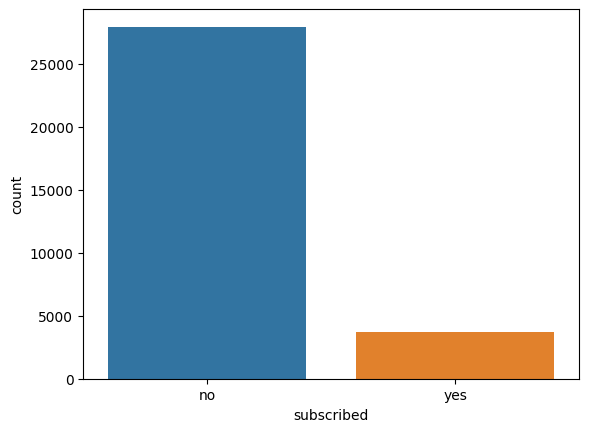

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [100]:
sns.countplot(x='subscribed', data=train)
plt.show()
train['subscribed'].value_counts()

- Larger number of clients have not subscribed compared to those who subscribed 

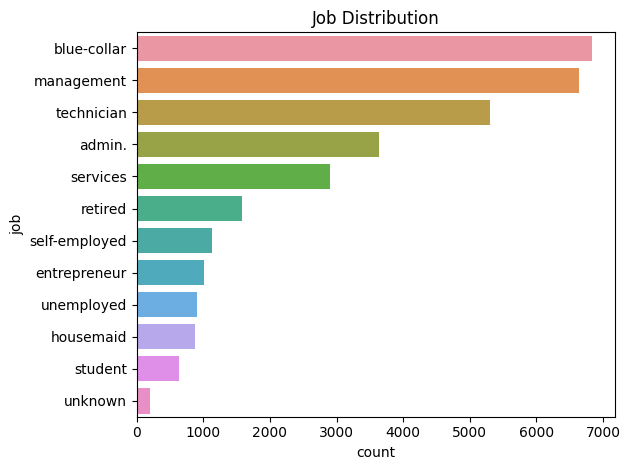

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

In [101]:
sns.countplot(data=train, y='job', order = train['job'].value_counts().index)
plt.title('Job Distribution')
plt.tight_layout()
plt.show()

train['job'].value_counts()

- The clients with job titles- blue-collar, management,technician and admin are getting high prevalence and the least prevalence is given to unemployee, housemaid, student and unknown

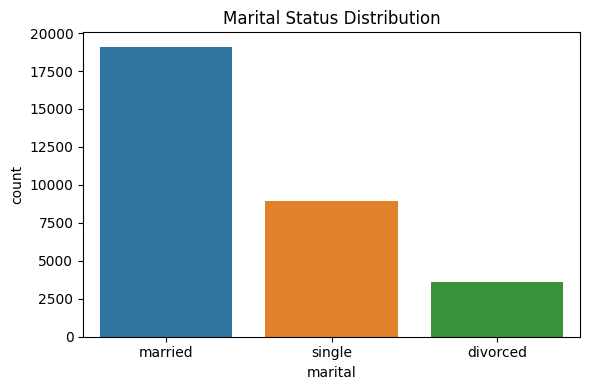

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

In [102]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='marital', order = train['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

train['marital'].value_counts()

- Majority of the clients are married individuals forming the largest group, and given the high prevalence followed by single and divorced individuals.

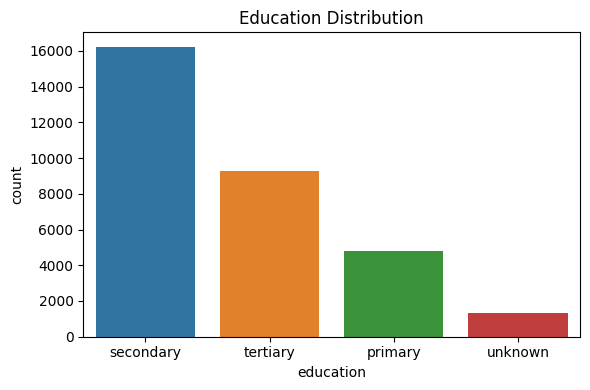

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64

In [103]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='education', order = train['education'].value_counts().index)
plt.title('Education Distribution')
plt.tight_layout()
plt.show()

train['education'].value_counts()

- The count plot indicates that the majority of clients have secondary education, followed by those with tertiary, and then primary education. 
- A small portion of the client base has an unknown education level. This suggests that most clients have at least completed high school.

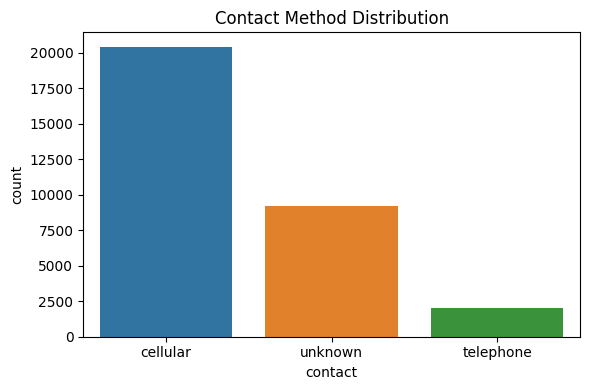

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64

In [104]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='contact', order = train['contact'].value_counts().index)
plt.title('Contact Method Distribution')
plt.tight_layout()
plt.show()

train['contact'].value_counts()

- The plot displays the distribution of contact methods used for communicating with clients.
- The 'cellular' method is the most commonly used, followed by 'unknown', and 'telephone' is the least used. This suggests that mobile communication is the primary way of reaching out to clients

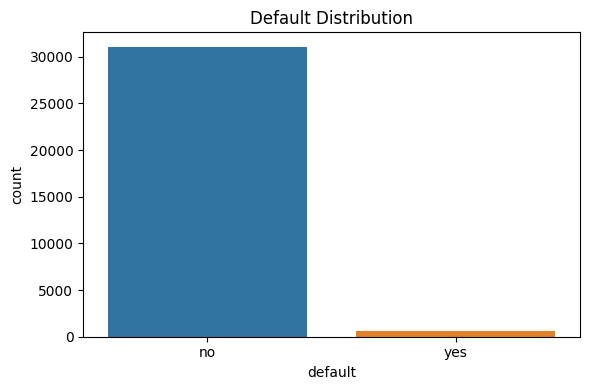

default
no     31062
yes      585
Name: count, dtype: int64

In [105]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='default', order = train['default'].value_counts().index)
plt.title('Default Distribution')
plt.tight_layout()
plt.show()

train['default'].value_counts()

- The vast majority of clients have no default, with a very small number having a credit default.

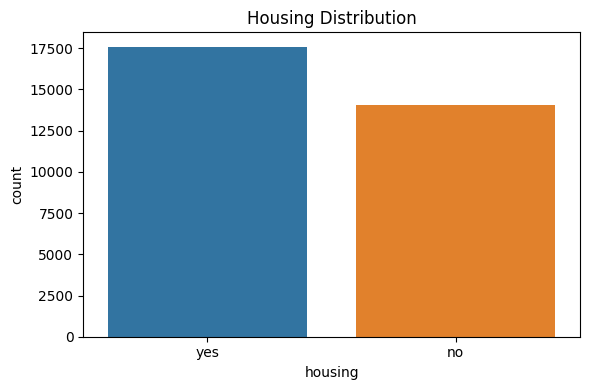

housing
yes    17584
no     14063
Name: count, dtype: int64

In [106]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='housing', order = train['housing'].value_counts().index)
plt.title('Housing Distribution')
plt.tight_layout()
plt.show()

train['housing'].value_counts()

- The count plot indicates that more clients have housing loans compared to those who do not. This could be a biggest challenge for further financial loan

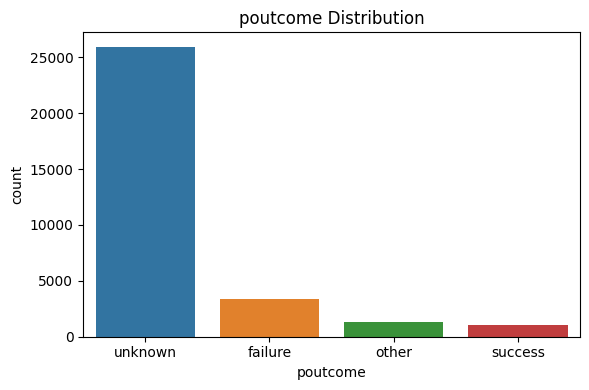

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

In [107]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='poutcome', order = train['poutcome'].value_counts().index)
plt.title('poutcome Distribution')
plt.tight_layout()
plt.show()

train['poutcome'].value_counts()

- The count plot for 'poutcome' shows the distribution of the outcome of the previous marketing campaign. 
- The 'unknown' category has the highest count, indicating that for many clients, there is no information about the outcome of the previous campaign.
- Among known outcomes, 'failure' is on high count than 'success'

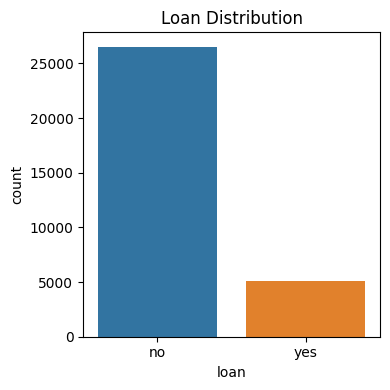

loan
no     26516
yes     5131
Name: count, dtype: int64

In [108]:
plt.figure(figsize=(4, 4))
sns.countplot(data=train, x='loan', order = train['loan'].value_counts().index)
plt.title('Loan Distribution')
plt.tight_layout()
plt.show()

train['loan'].value_counts()

- The count plot reveals that a larger number of clients do not have personal loans, while a smaller portion does. This could be a biggest challenge for further financial loans

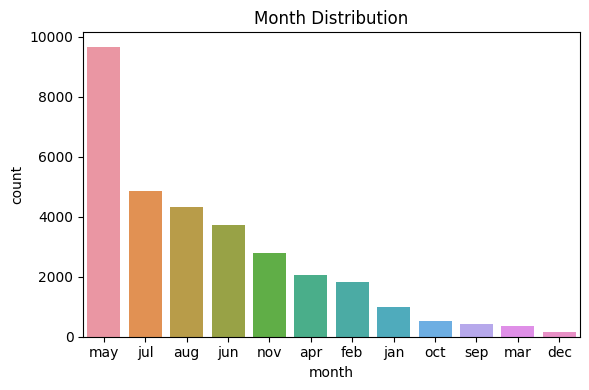

month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64

In [109]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='month', order = train['month'].value_counts().index)
plt.title('Month Distribution')
plt.tight_layout()
plt.show()

train['month'].value_counts()

- The count plot for 'month' indicates when clients were last contacted in the context of the current marketing campaign. May, July, Aug months show significantly higher contact frequencies than sep, mar, dec which can help in marketing strategies

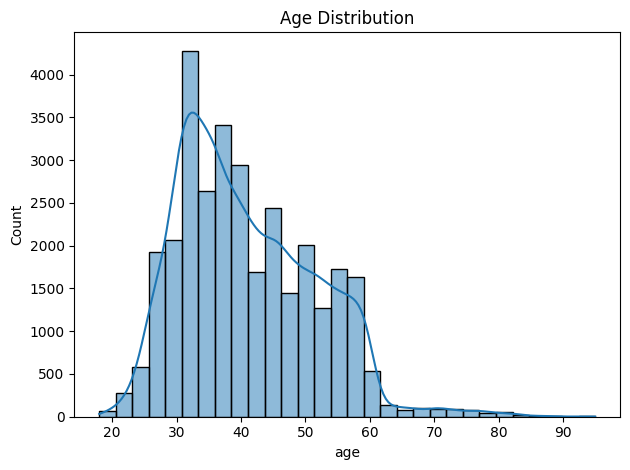

In [110]:
sns.histplot(train['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

- The histogram with a kernel density estimate (KDE) shows the age distribution of clients. The distribution is right-skewed, indicating a clients are of age 25-60 are more in number when compared to older clients

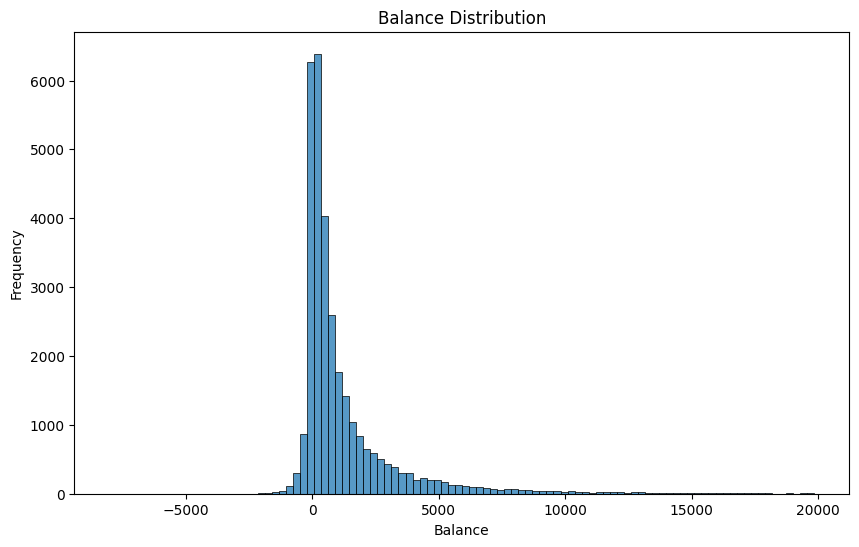

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(train[train['balance'] < 20000]['balance'], bins=100, kde=False)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

- Most clients have lower balances, while fewer clients having higher balances.Most individuals have a balance of less than 5,000, with a few outliers having higher balances

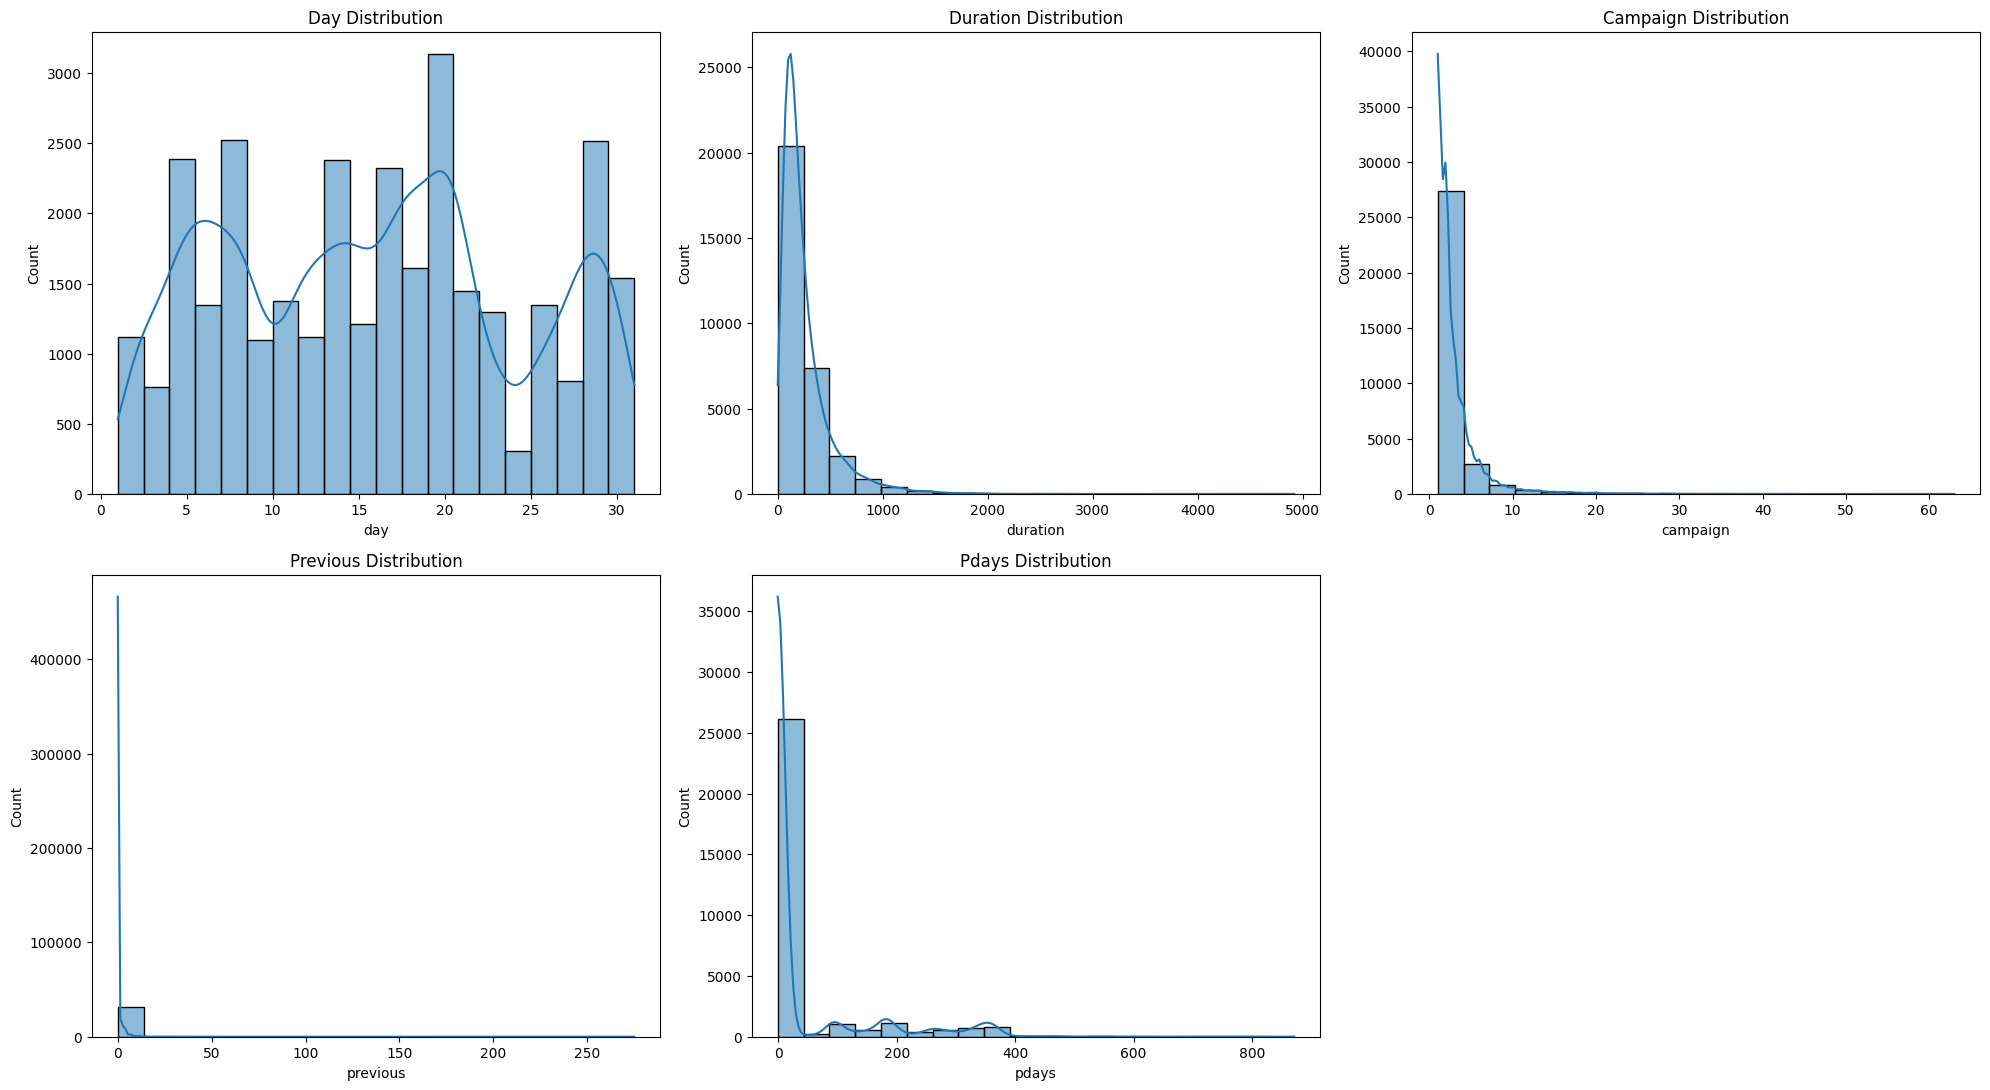

In [112]:
features = ['day', 'duration', 'campaign', 'previous', 'pdays']

plt.figure(figsize=(20, 16))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(train[feature], bins=20, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')

plt.tight_layout()
plt.show()

- Day Distribution: Shows which day of the month clients were contacted
- Duration Distribution: Represents the contact duration with clients
- Campaign Distribution: Indicates the number of contacts performed during this campaign for each client.
- Previous Distribution: Reflects the number of contacts before the campaign with an each client.
- Pdays Distribution: Shows the number of days passed by, after the client was last contacted from a previous campaign.

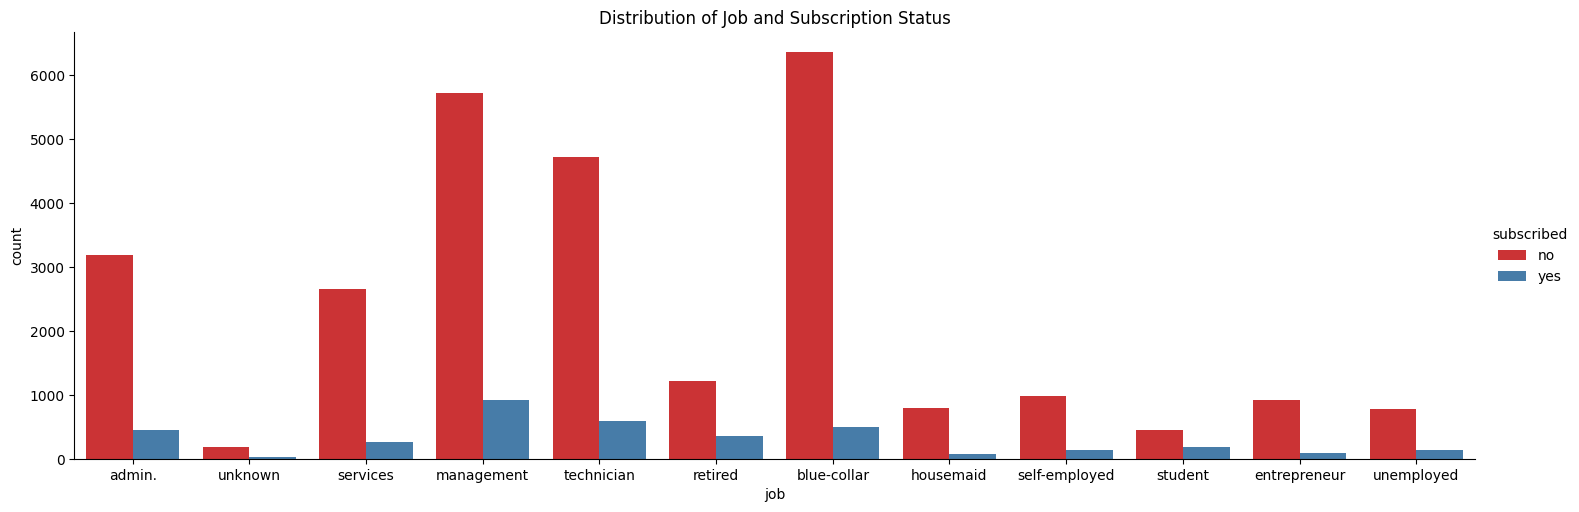

In [113]:
sns.catplot(x='job', hue='subscribed', data=train, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Job and Subscription Status')
plt.show()

- The categorical plot illustrates the clients contacted for each job category, segmented by their subscription status to a term deposit.
- Blue-collar, management, technician jobs are having higher subcription status

<Figure size 2000x1000 with 0 Axes>

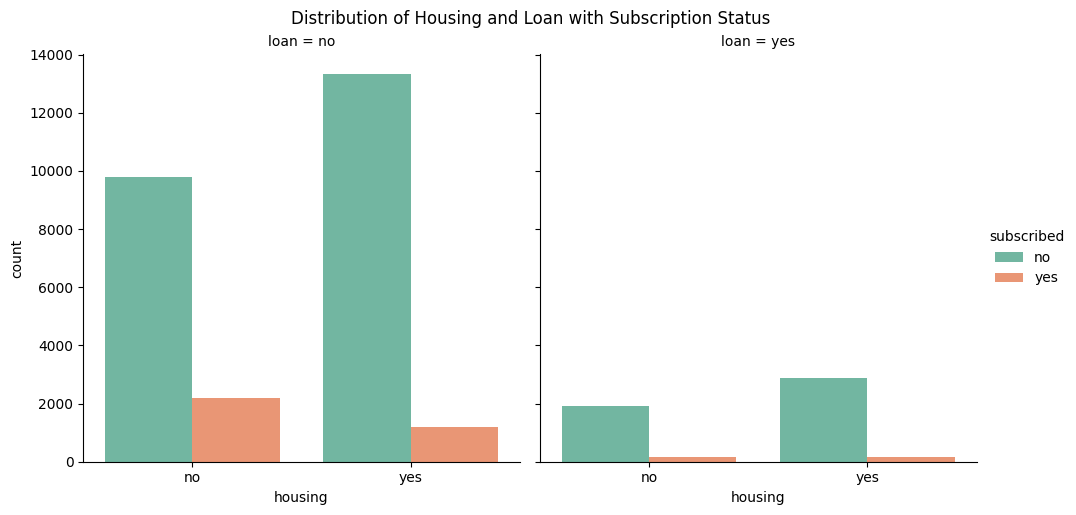

In [114]:
plt.figure(figsize=(20, 10))
sns.catplot(x='housing', hue='subscribed', col='loan', data=train, kind='count', palette='Set2', col_wrap=2)
plt.suptitle('Distribution of Housing and Loan with Subscription Status', y=1.02)
plt.show()

- The plot displays the distribution of clients' housing and loan status
- The data is segmented into two groups: clients with personal loans and clinets without.
- The data reveals that clients with 'NO' subscriptions to term deposits outnumber those with 'Yes,' emphasizing a higher prevalence of 'NO' subscriptions in relation to housing and loan status

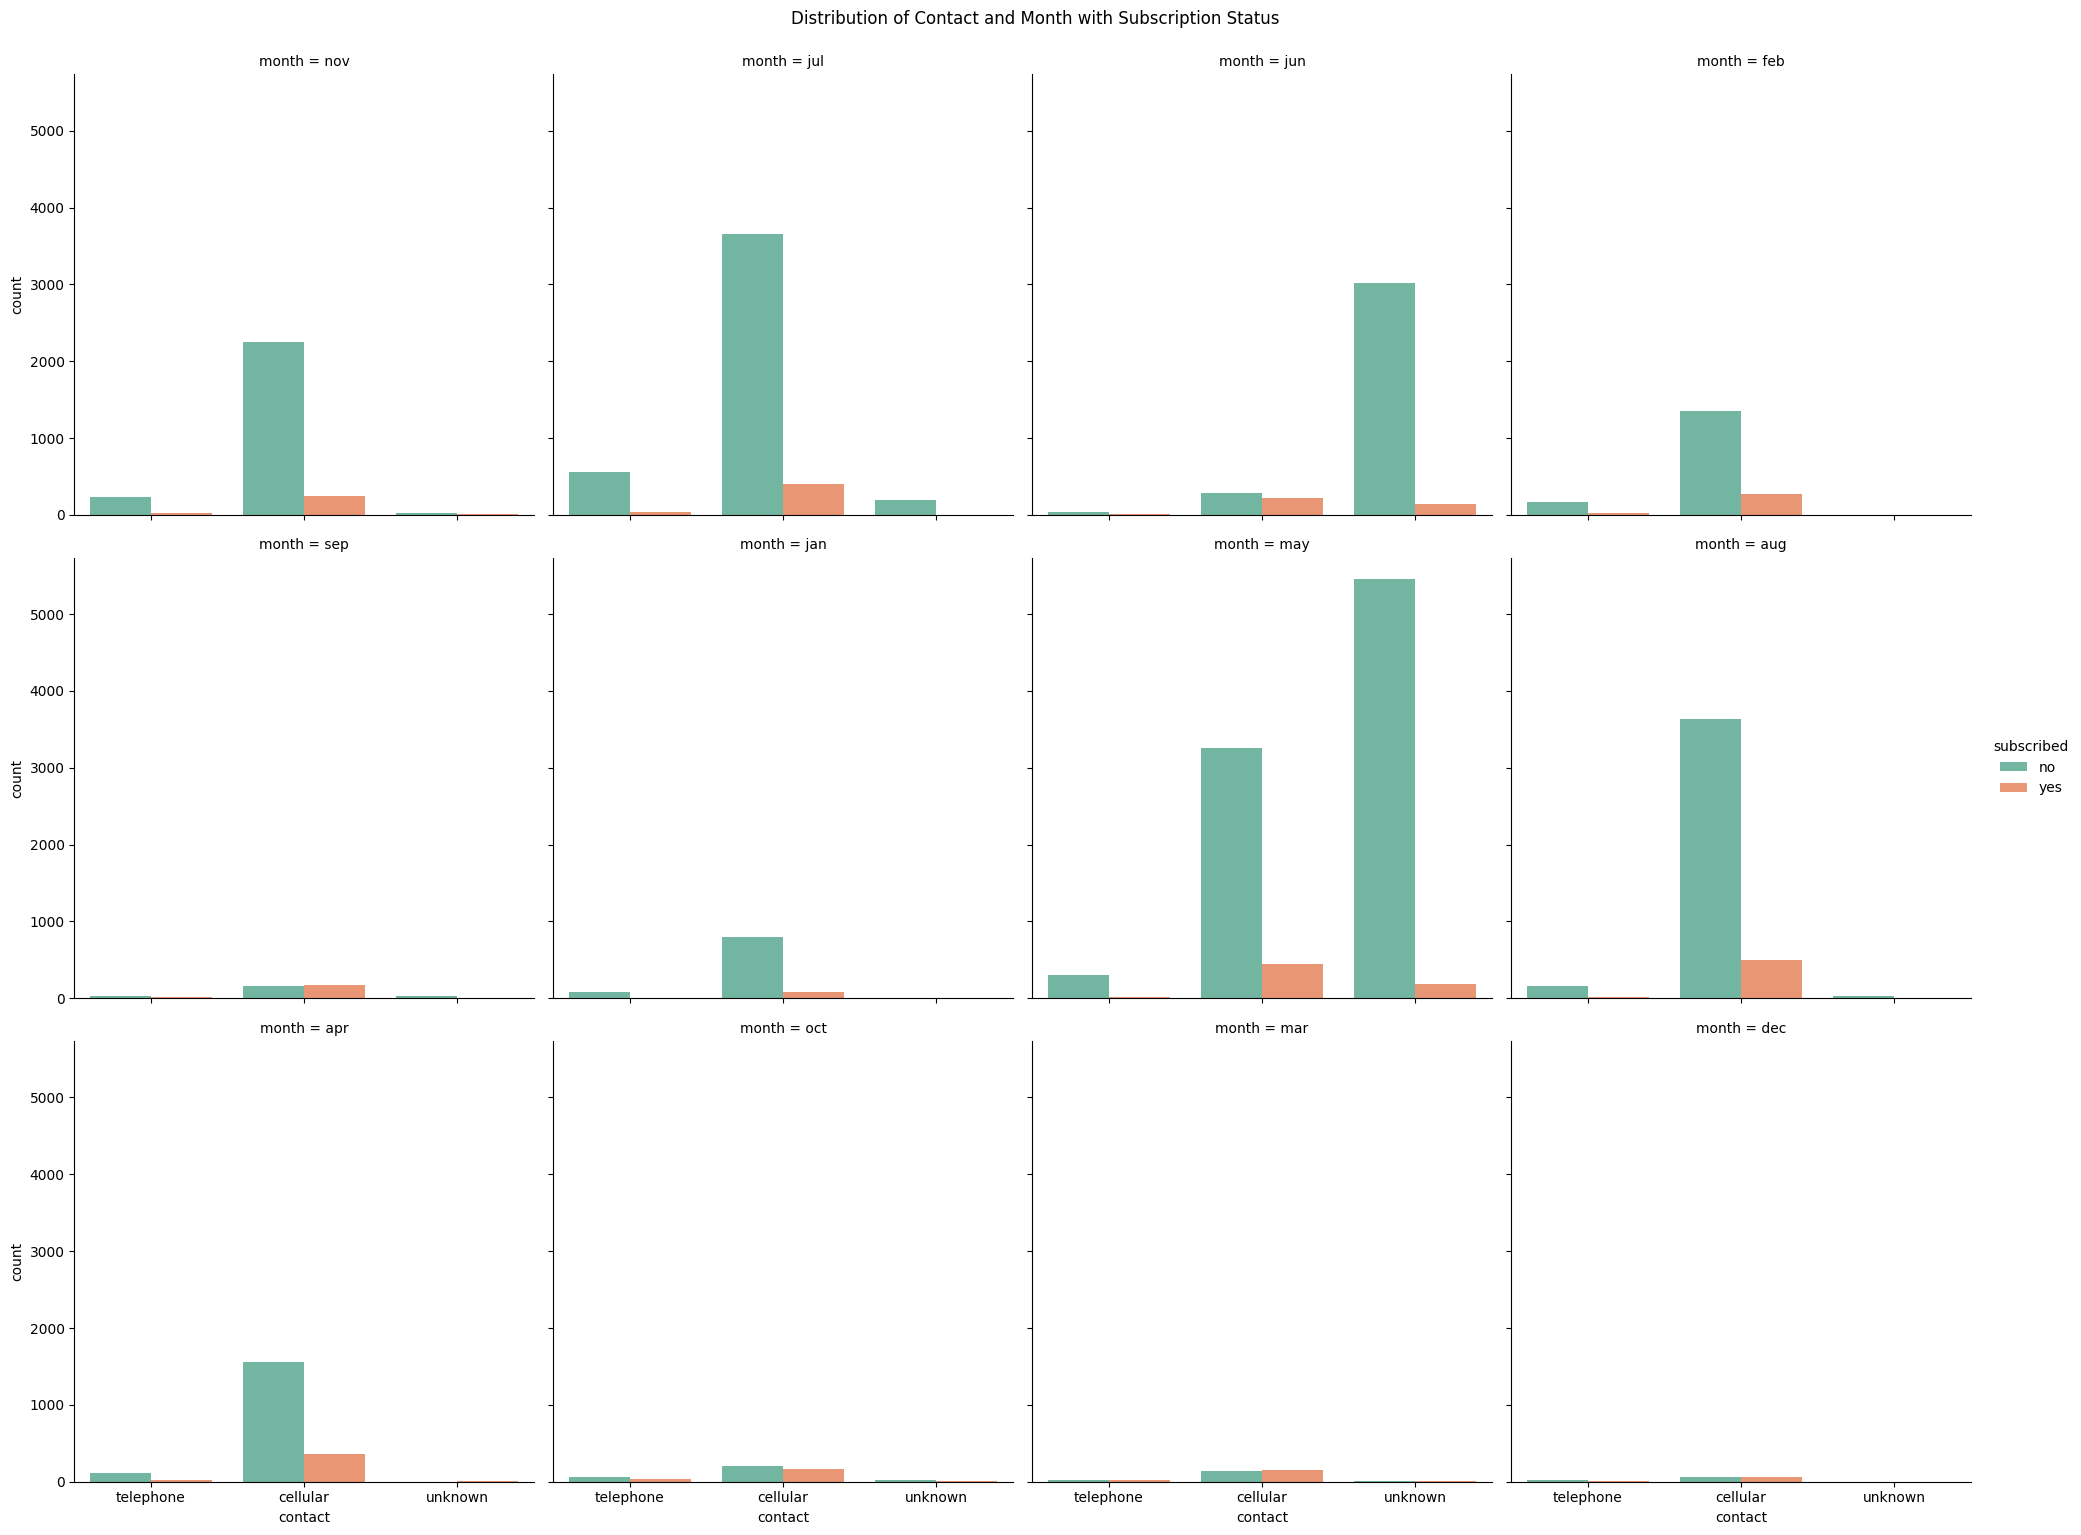

In [115]:
sns.catplot(x='contact', hue='subscribed', col='month', data=train, kind='count', palette='Set2', col_wrap=4)
plt.suptitle('Distribution of Contact and Month with Subscription Status', y=1.02)
plt.show()

- The plot provides a visual comparison of the contact method used for the marketing campaign across different months, segmented by the subscription status of the clients
- The most contracted months are May, July, Aug and June through cellular contact
- But then the 'NO' subscription rate is higher when compared to 'Yes' indicating a lower success rate for term deposit subscriptions during these months.

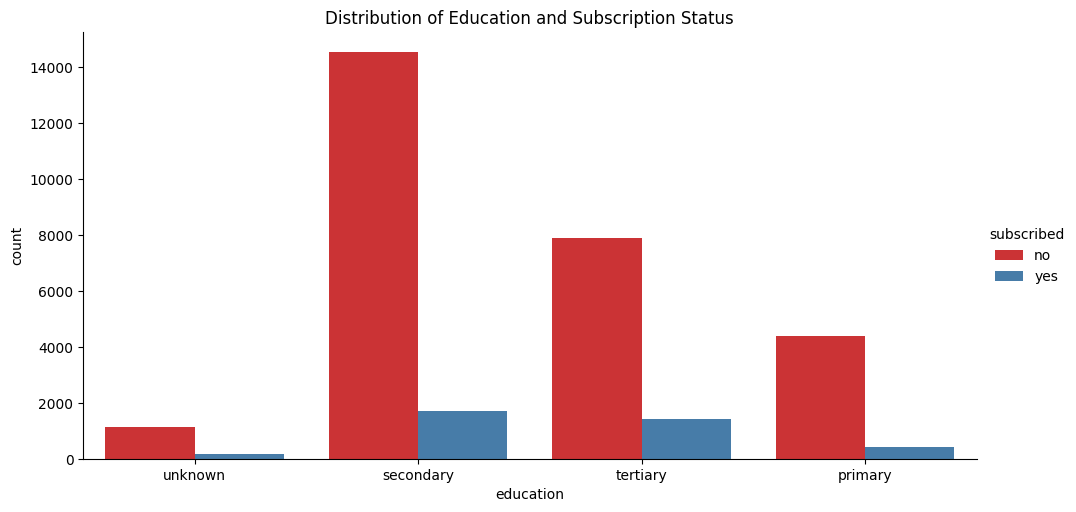

In [116]:
sns.catplot(x='education', hue='subscribed', data=train, kind='count', palette='Set1', aspect=2)
plt.title('Distribution of Education and Subscription Status')
plt.show()

- The plot illustrates the count of clients by their education level, with a hue indicating their subscription status to a term deposit
-  A small portion of the clients have an unknown education level. This suggests that most clients have at least completed high school.

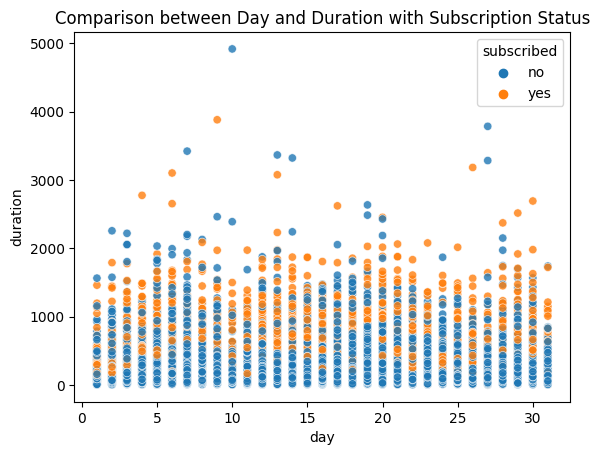

In [117]:
sns.scatterplot(x='day', y='duration', data=train, hue='subscribed', alpha=0.8)
plt.title('Comparison between Day and Duration with Subscription Status')
plt.show()

- This visualization can help in understanding if there's any visible trend between the day of the month, the duration of the last contact, and the likelihood of a client subscribing to a term deposit
- The 'NO' subscription rate in term deposit is higher based on contact day and duration

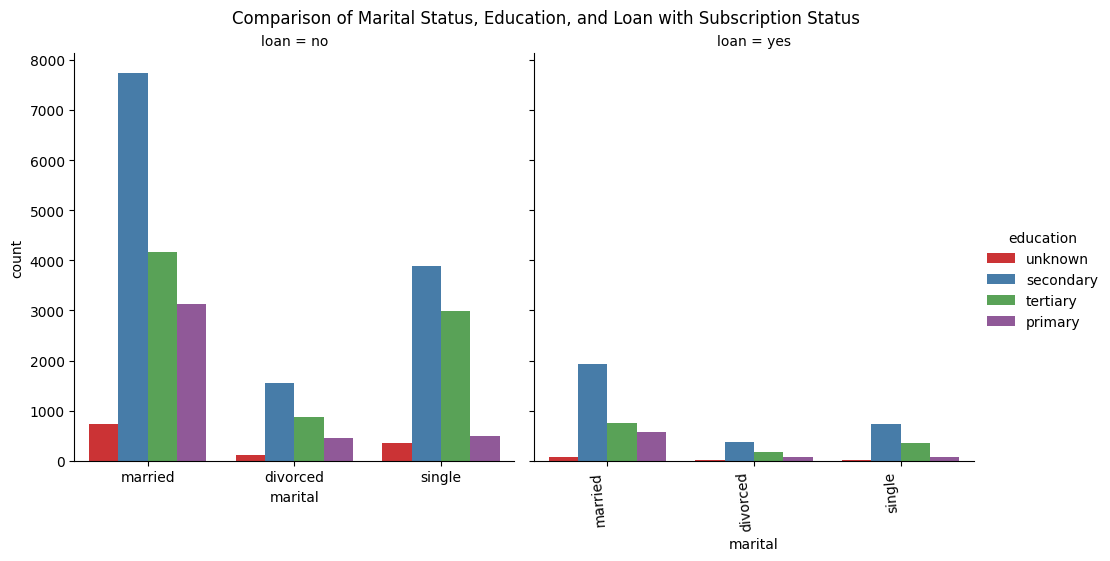

In [118]:
sns.catplot(x='marital', hue='education', col='loan', data=train, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Education, and Loan with Subscription Status', y=1.02)
plt.xticks(rotation=95, ha='right')
plt.show()

- This visualization helps in understanding the distribution of clients' marital status and education across different loan statuses
- But then the 'NO' subscription rate is higher when compared to 'Yes' indicating a lower success rate for term deposit subscriptions

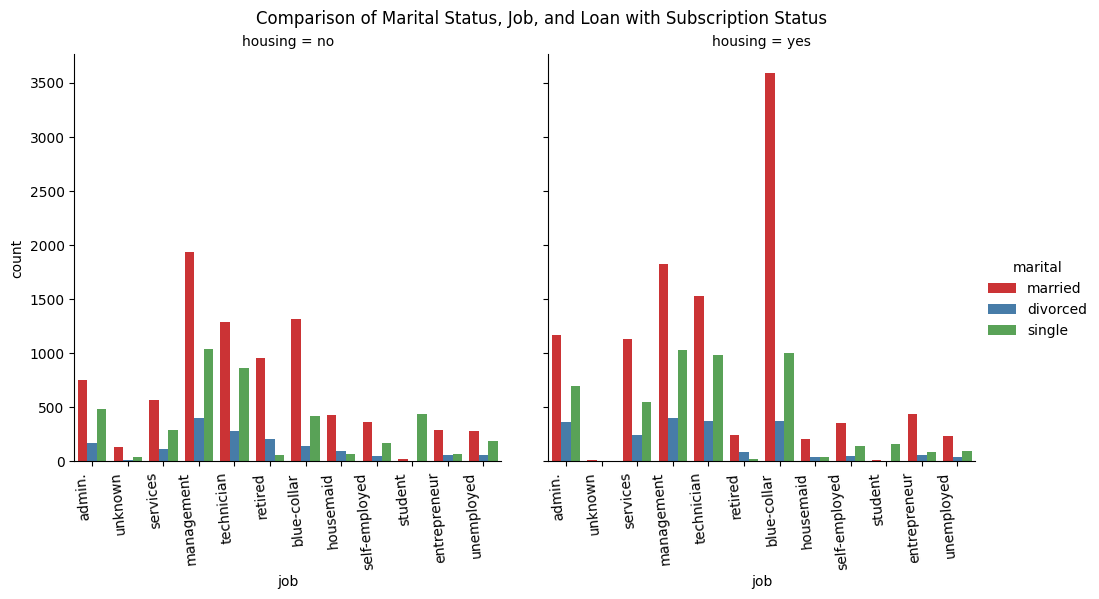

In [119]:
s=sns.catplot(x='job', hue='marital', col='housing', data=train, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Job, and Loan with Subscription Status', y=1.02)
s.set_xticklabels(rotation=95, ha='right')
plt.show()

- The plot provides a comparison of clients' jobs and marital status, segmented by whether they have housing loans. 
- This visualization can help  to understand, 'YES' subscription rate is higher when compared to 'No' indicating a aerage success rate for term deposit subscriptions for few professions

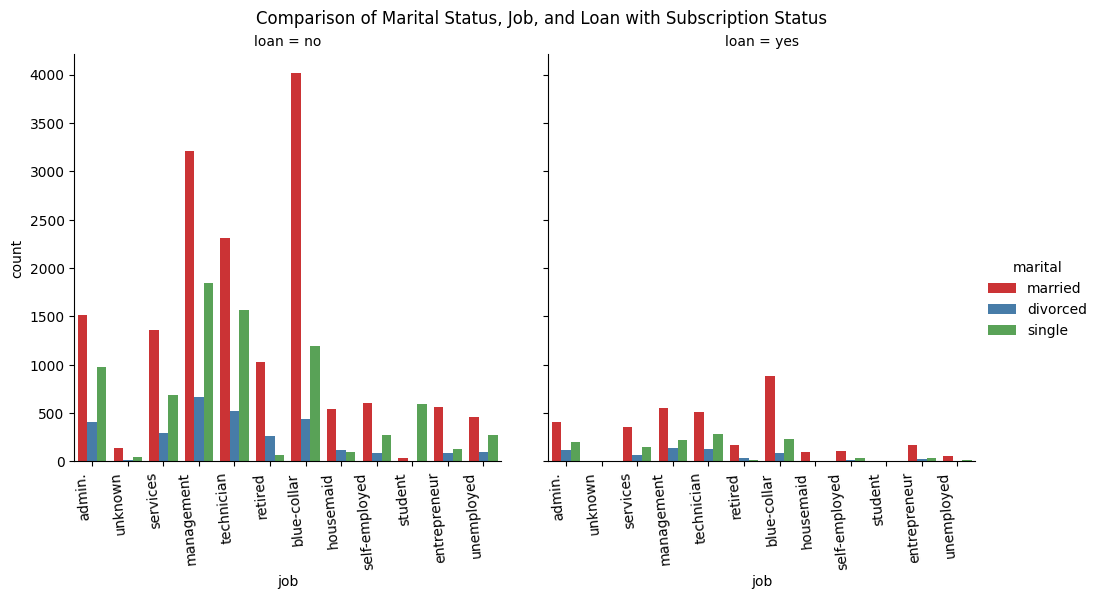

In [120]:
s=sns.catplot(x='job', hue='marital', col='loan', data=train, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Job, and Loan with Subscription Status', y=1.02)
s.set_xticklabels(rotation=95, ha='right')
plt.show()

- The plot illustrates the count of clients by job type, differentiated by marital status and segmented by whether they have a personal loan.
- But then the 'NO' subscription rate is higher when compared to 'Yes' indicating a lower success rate for term deposit subscriptions

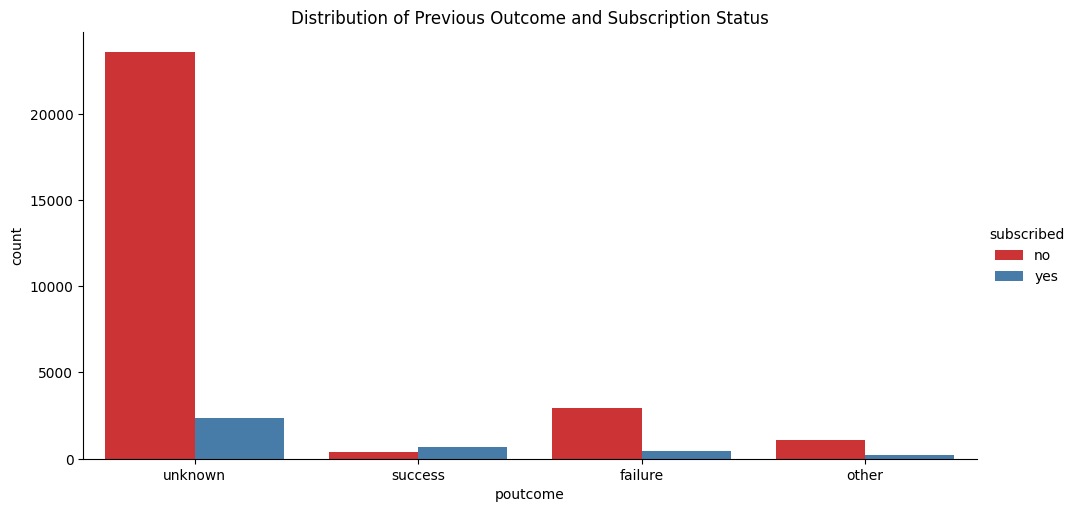

In [121]:
sns.catplot(x='poutcome', hue='subscribed', data=train, kind='count', palette='Set1', aspect=2)
plt.title('Distribution of Previous Outcome and Subscription Status')
plt.show()

- The plot displays the distribution of clients' previous outcomes of the campaign and their current subscription status
- Where the 'NO' subscription rate is higher when compared to 'Yes' indicating a lower success rate for term deposit subscriptions from unknown segment of clinets

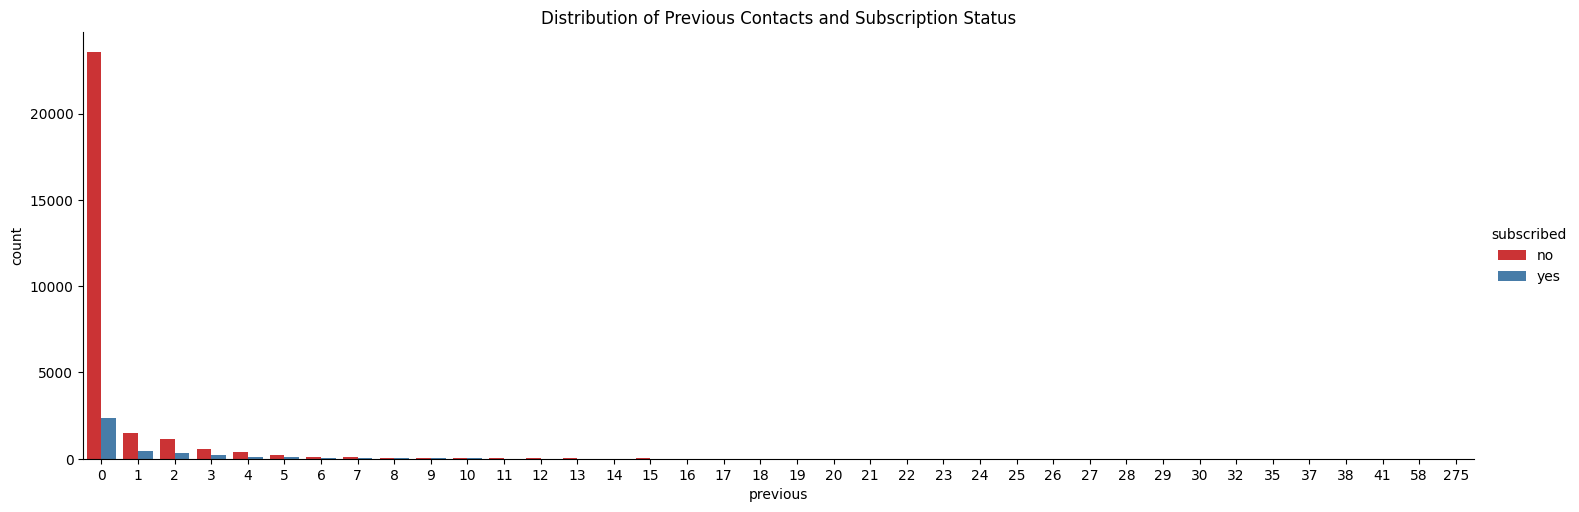

In [122]:
sns.catplot(x='previous', hue='subscribed', data=train, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Previous Contacts and Subscription Status')
plt.show()

- The plot above visualizes the distribution of previous contacts and the subscription status. 
- It shows the count of clients who subscribed to a term deposit or not, categorized by the number of contacts made previously. 
- This can provide insights into the relationship between the number of previous contacts and the probability of a client subscribing to a term deposit.
- Where the 'NO' subscription rate is higher when compared to 'Yes' indicating a lower success rate for term deposit subscriptions from previous conctact of clients

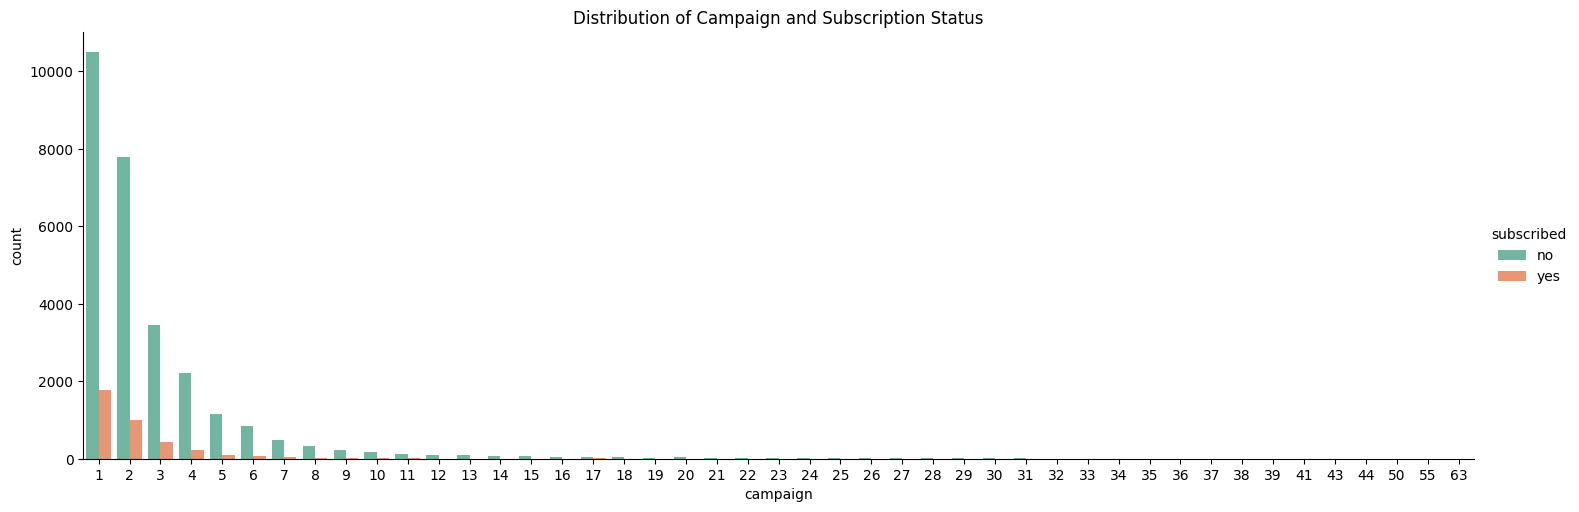

In [123]:
sns.catplot(x='campaign', hue='subscribed', data=train, kind='count', palette='Set2', aspect=3)
plt.title('Distribution of Campaign and Subscription Status')
plt.show()

- The plot visualizes the number of contacts made during the current campaign and the subscription status of clients.
- Where the 'NO' subscription rate is higher when compared to 'Yes' indicating a lower success rate for term deposit subscriptions from the campaign conducted

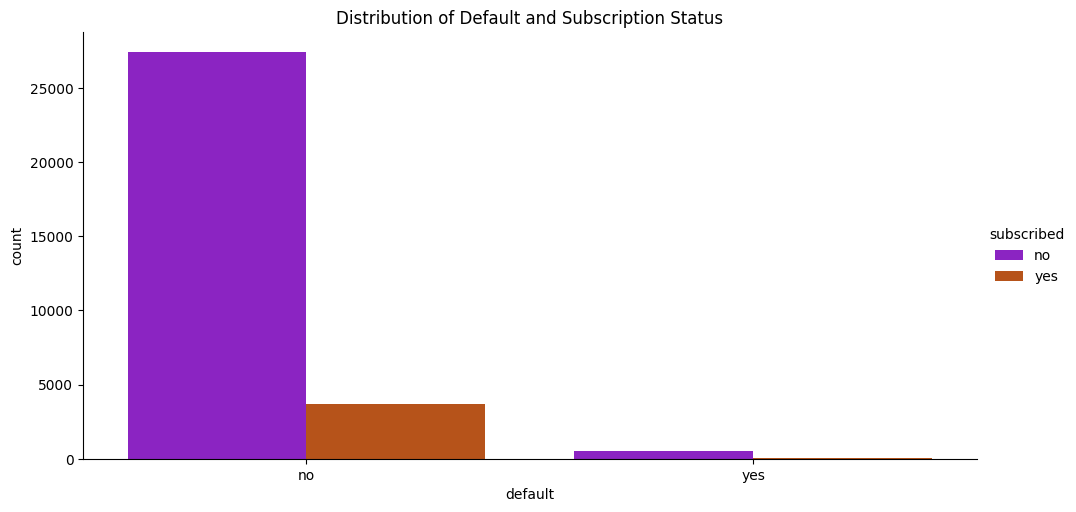

In [124]:
sns.catplot(x='default', hue='subscribed', data=train, kind='count', palette = 'gnuplot', aspect=2)
plt.title('Distribution of Default and Subscription Status')
plt.show()

- The plot shows the distribution of clients based on whether they have credit in default and their subscription status to a term deposit.
- Where the 'NO' subscription rate is higher when compared to 'Yes' indicating a lower success rate for term deposit subscriptions from the credit in default 

### Multivariate Analysis

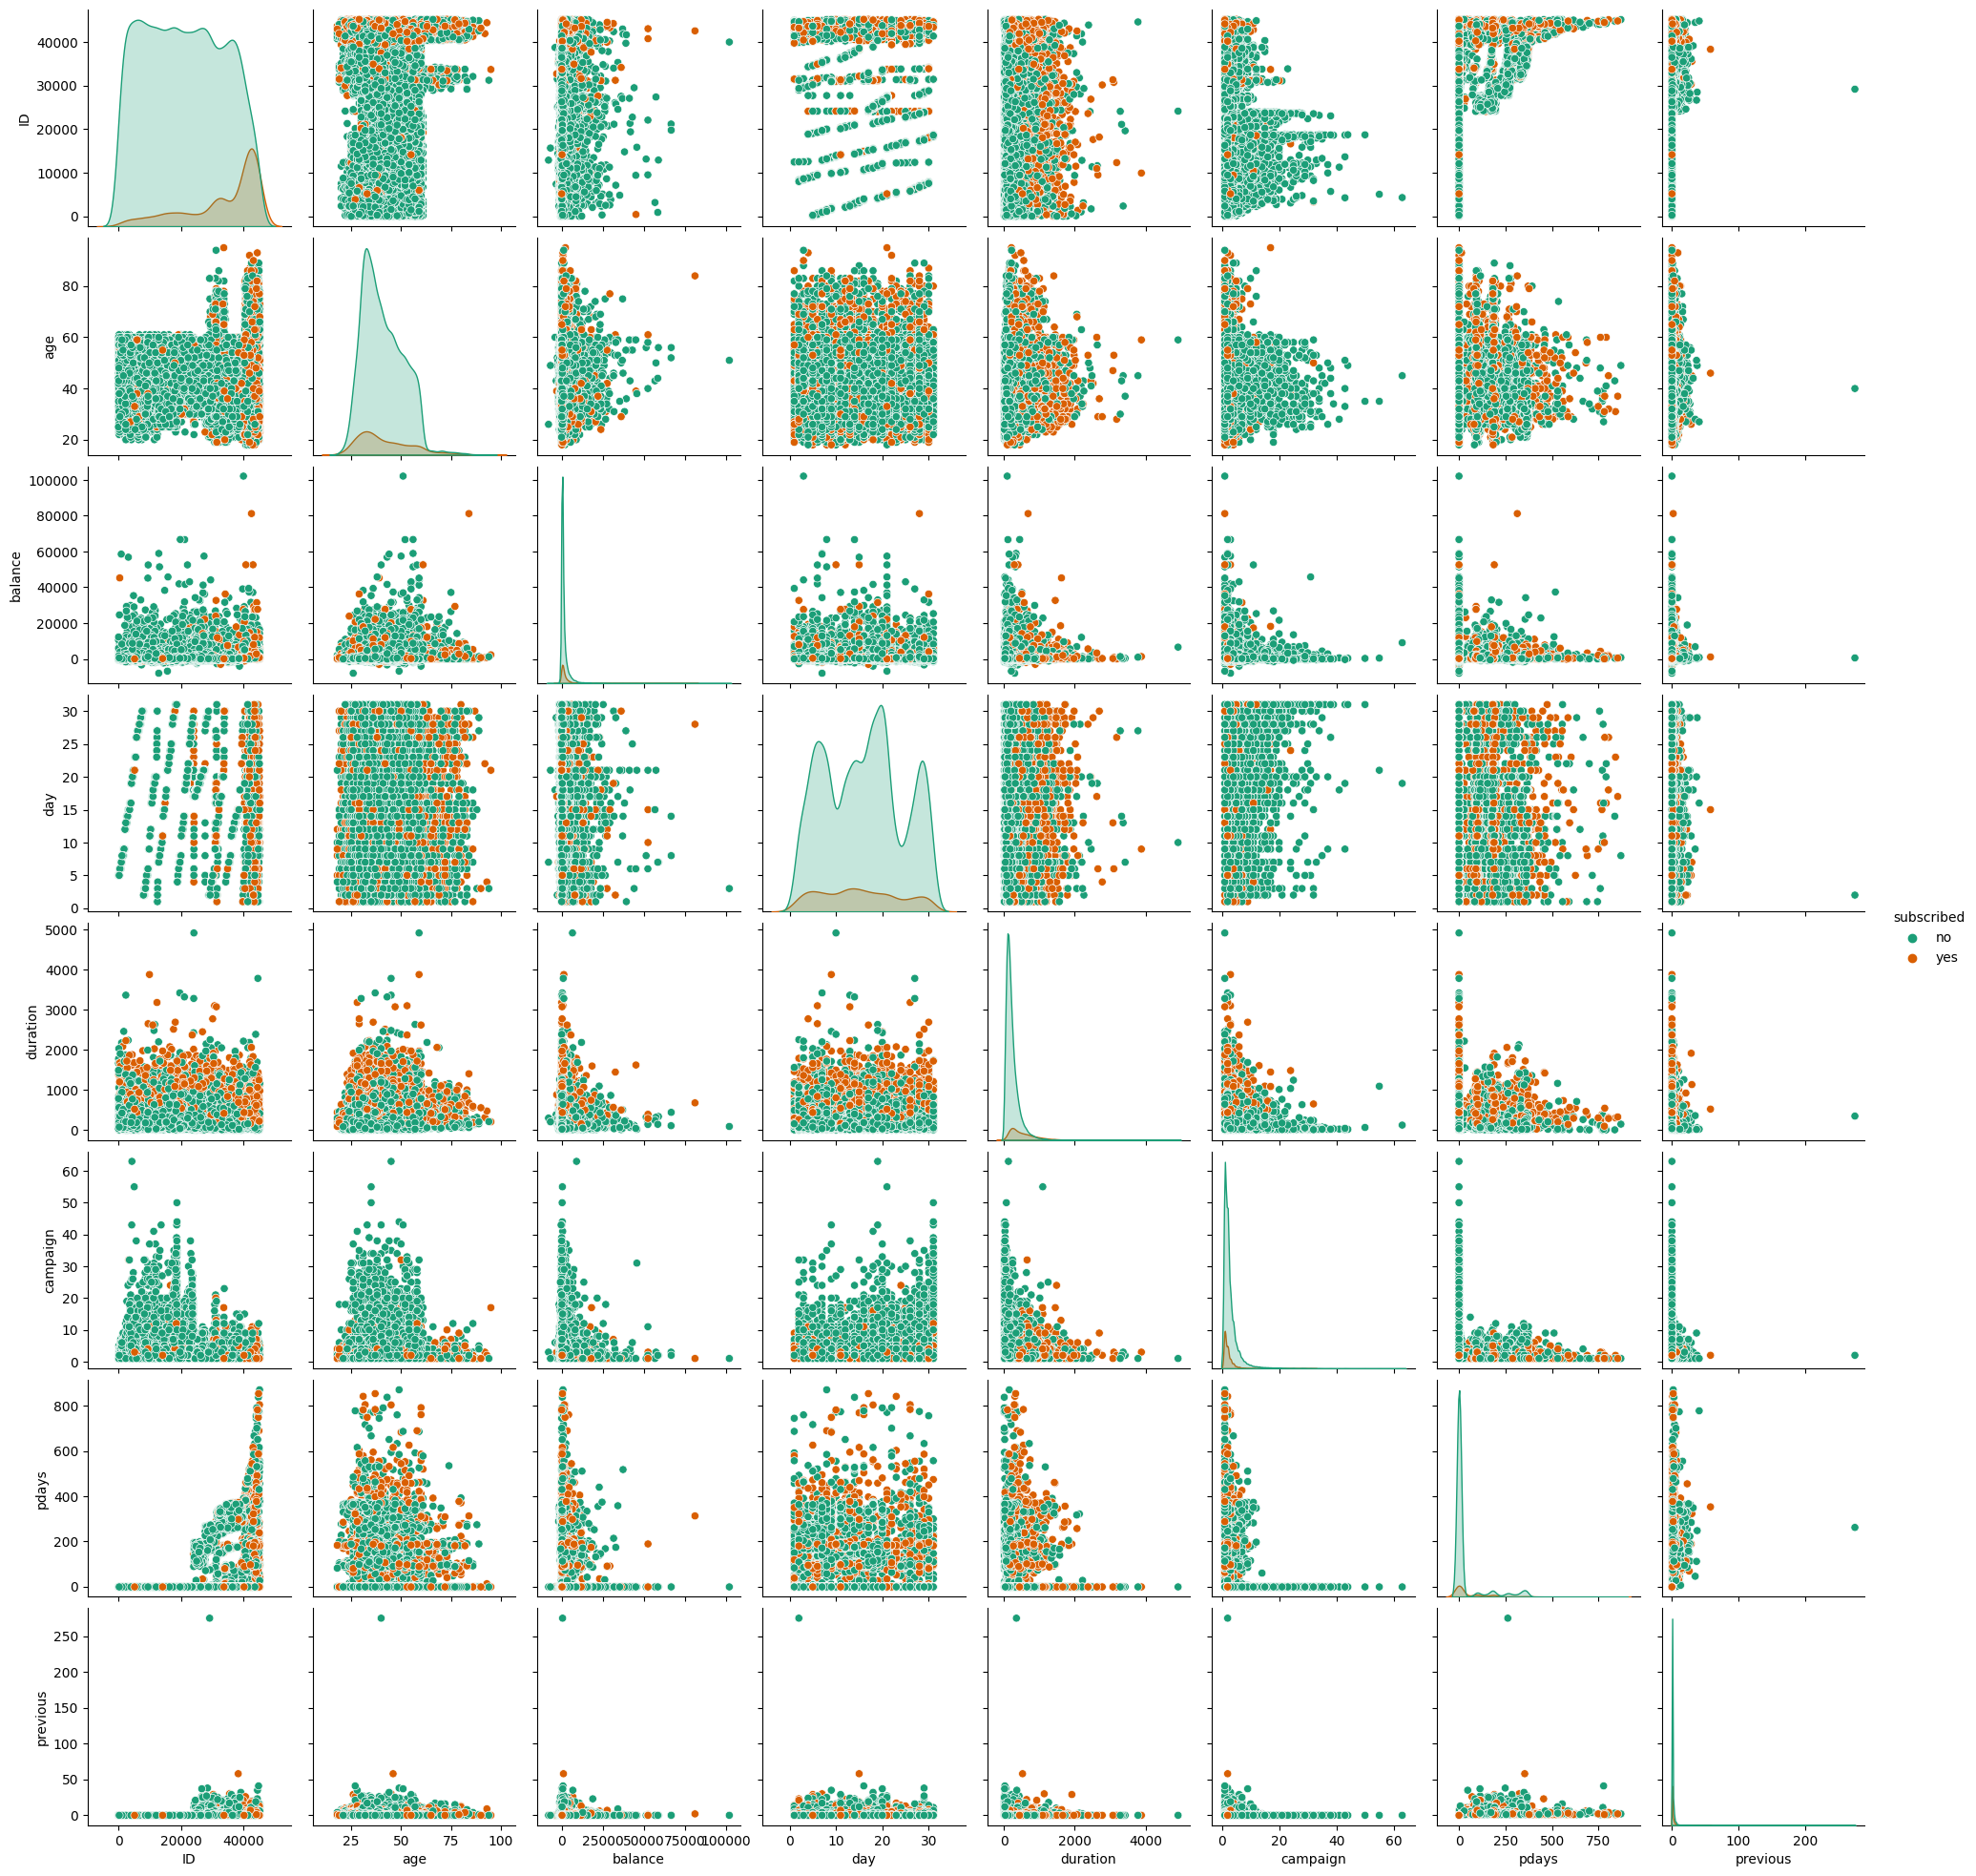

In [125]:
sns.pairplot(train, hue ='subscribed',palette = 'Dark2')
plt.show()

- There is a moderate positive correlation between ID and pdays, suggesting that as the ID number increases, there's a tendency for more days to pass since the client was last contacted.
- Day and campaign have a positive correlation, indicating that contacts tend to happen more frequently on certain days.
- Most variables have very low correlations with each other, suggesting no strong linear relationships between them

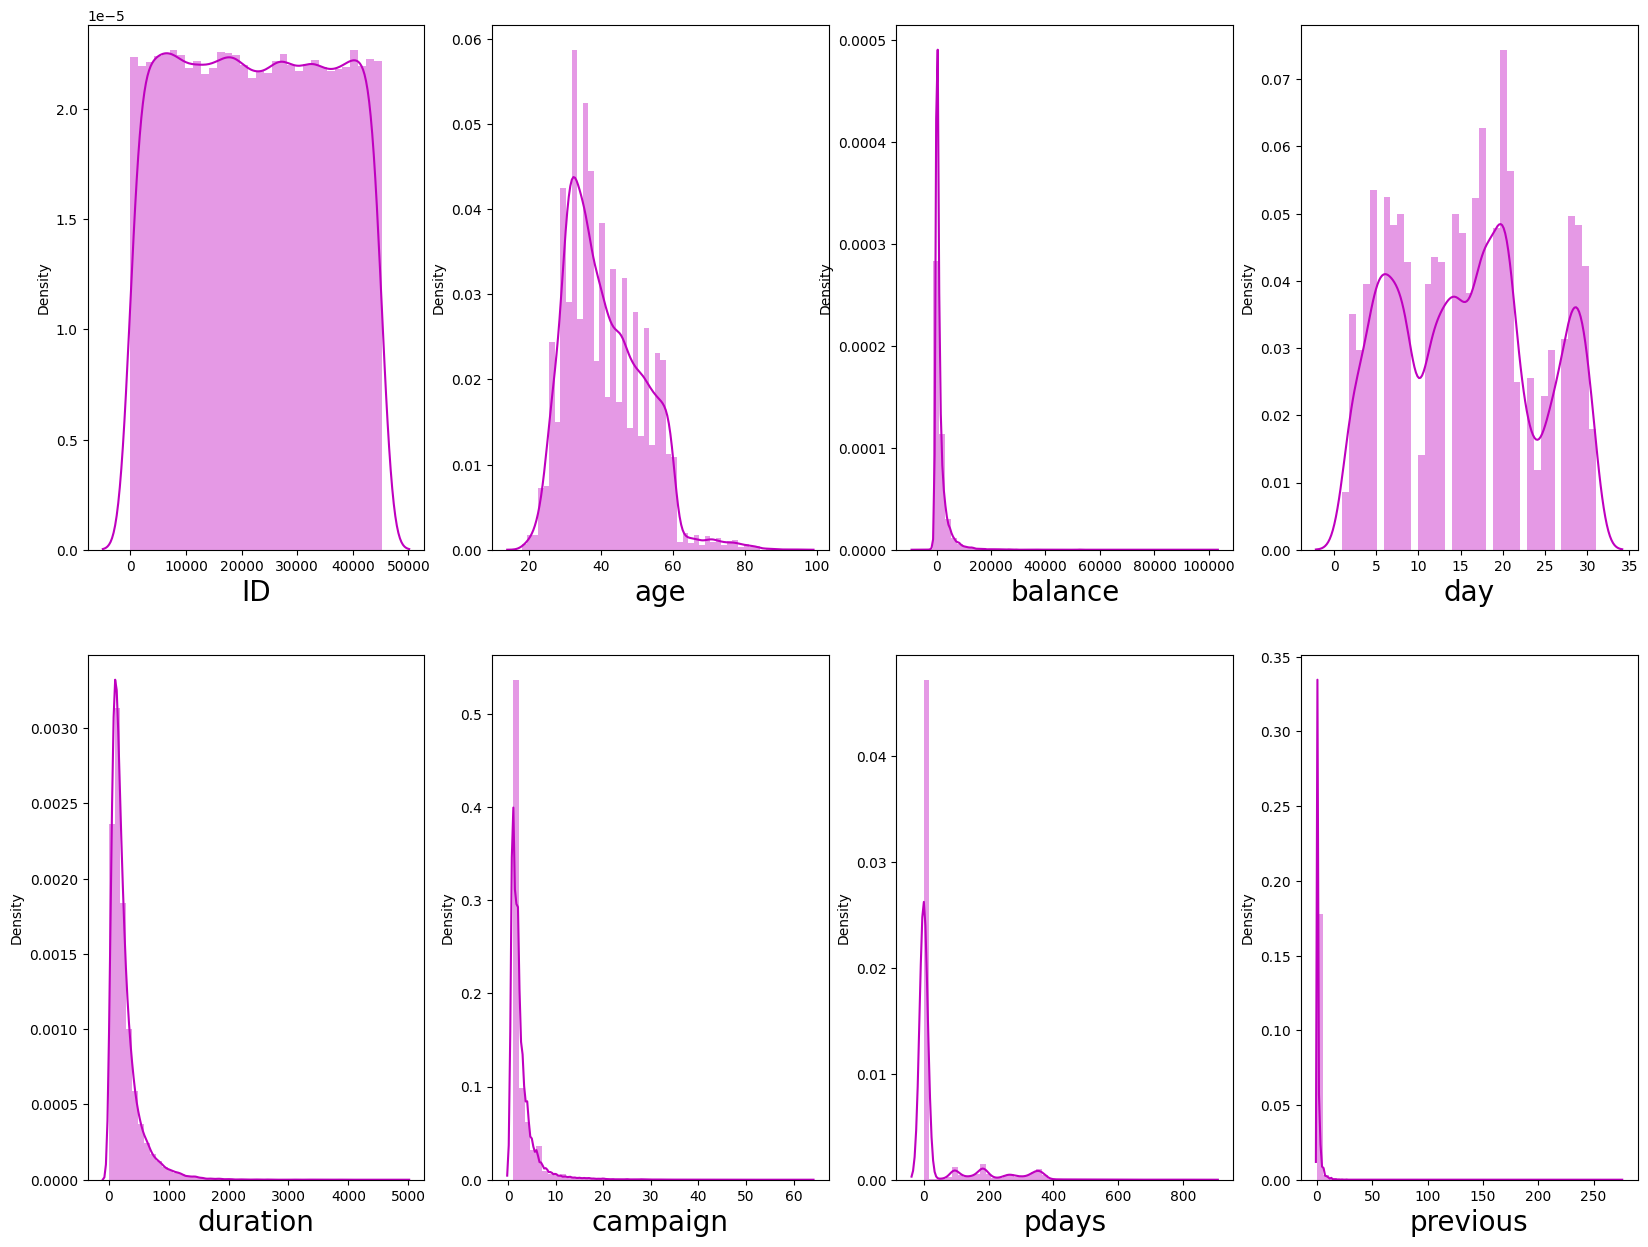

In [126]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(train[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

- The visualizations above display the distributions of the numerical columns in the dataset. Each subplot corresponds to a different numerical attribute, showing its distribution and skewness or outliers.

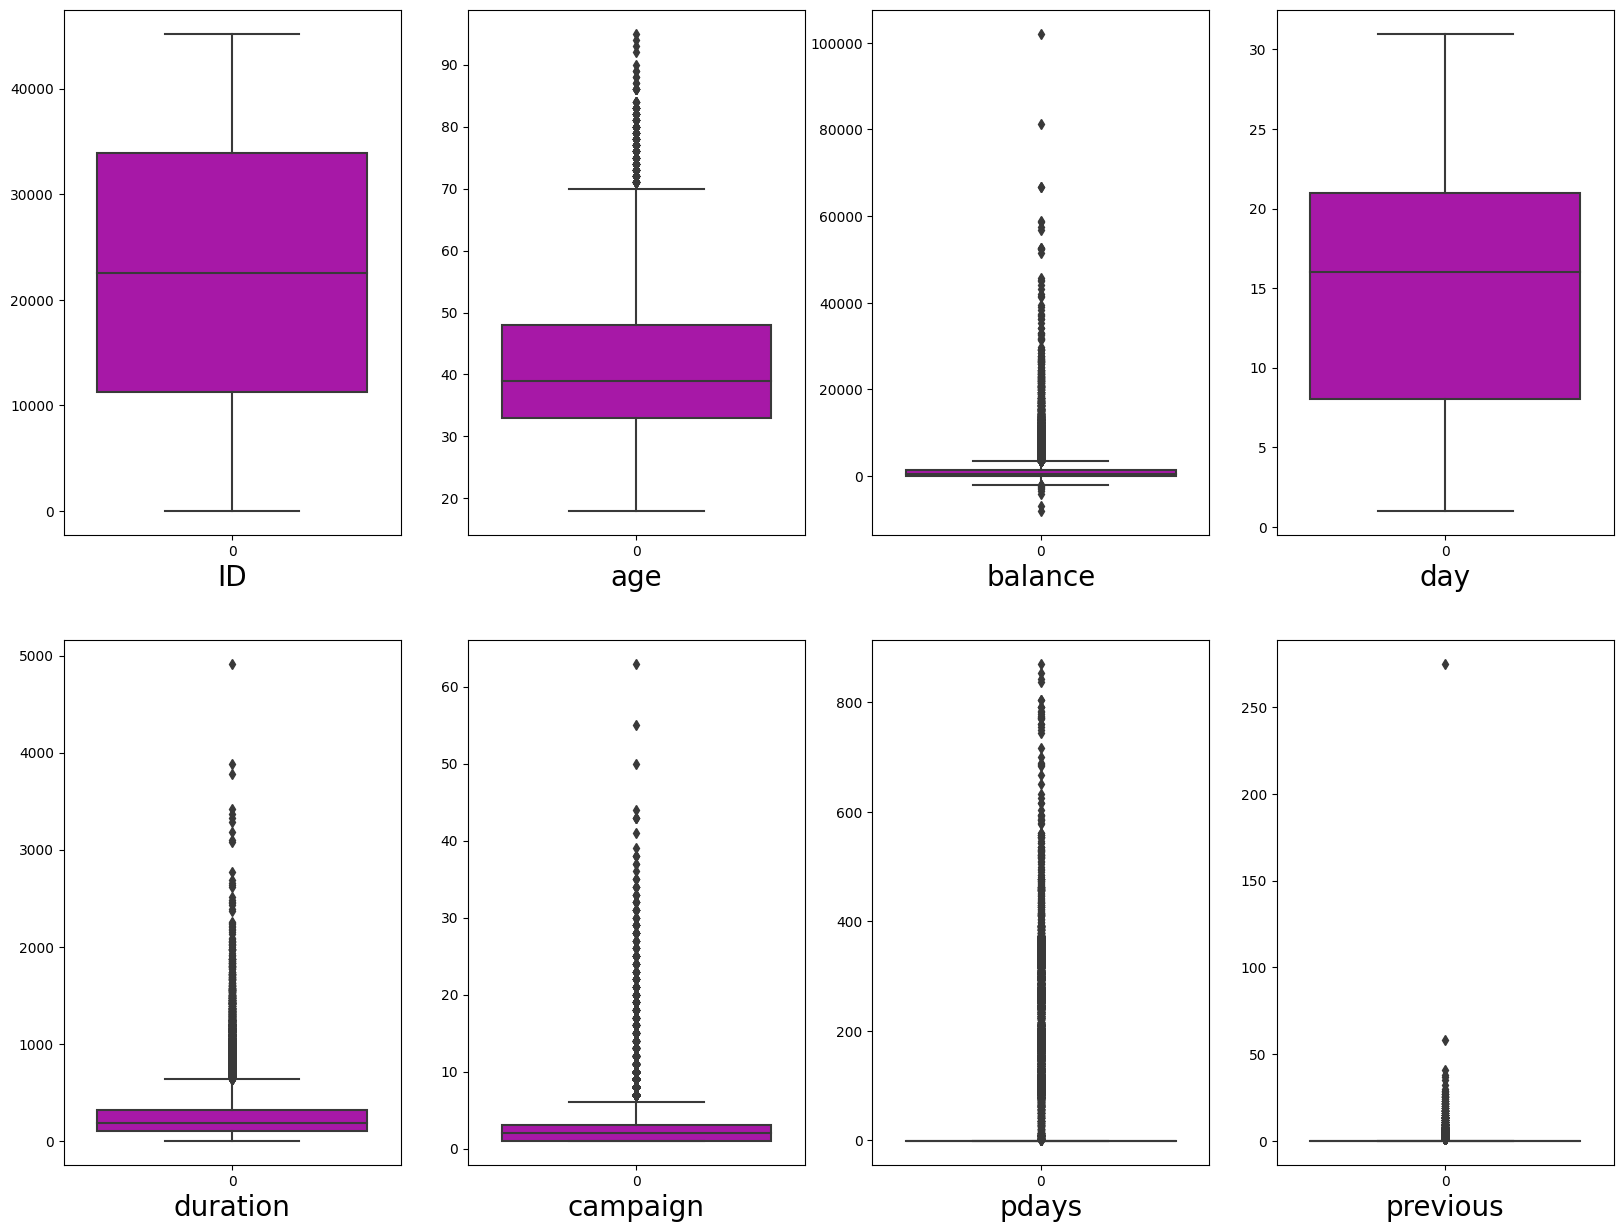

In [127]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(train[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

- The boxplots provide a visual summary of the numerical columns' distributions, highlighting the median, quartiles, and outliers for each attribute

### Encoding categorical columns

In [128]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes == 'object':
        train[i] = oe.fit_transform(train[i].values.reshape(-1,1))
        
train

ID  age   job  marital  education  default  balance  housing  loan  \
0      26110   56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1      40576   31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2      15320   27   7.0      1.0        1.0      0.0      891      1.0   0.0   
3      43962   57   4.0      0.0        2.0      0.0     3287      0.0   0.0   
4      29842   31   9.0      1.0        1.0      0.0      119      1.0   0.0   
...      ...  ...   ...      ...        ...      ...      ...      ...   ...   
31642  36483   29   4.0      2.0        2.0      0.0        0      1.0   0.0   
31643  40178   53   4.0      0.0        2.0      0.0      380      0.0   1.0   
31644  19710   32   4.0      2.0        2.0      0.0      312      0.0   0.0   
31645  38556   57   9.0      1.0        1.0      0.0      225      1.0   0.0   
31646  14156   55   4.0      0.0        1.0      0.0      204      1.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  \
0          1.0   19    9.0        44         2     -1         0       3.0   
1          0.0   20    5.0        91         2     -1         0       3.0   
2          0.0   18    5.0       240         1     -1         0       3.0   
3          0.0   22    6.0       867         1     84         3       2.0   
4          0.0    4    3.0       380         1     -1         0       3.0   
...        ...  ...    ...       ...       ...    ...       ...       ...   
31642      0.0   12    8.0       116         2     -1         0       3.0   
31643      0.0    5    6.0       438         2     -1         0       3.0   
31644      0.0    7    1.0        37         3     -1         0       3.0   
31645      1.0   15    8.0        22         7    337        12       0.0   
31646      0.0   11    5.0      1973         2     -1         0       3.0   

       subscribed  
0             0.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
...           ...  
31642         0.0  
31643         1.0  
31644         0.0  
31645         0.0  
31646         1.0  

[31647 rows x 18 columns]

- Ordinal variables such as 'education', 'month', and 'poutcome' and nominal variables like 'job', 'marital', 'default', 'housing', 'loan', 'contact', and 'subscribed' have been ordinal encoded, resulting in additional columns for each unique value in these variables.

In [129]:
from scipy import stats

def remove_outliers(train):
    # Exclude the target variable if it's present
    if 'subscribed' in train.columns:
        target_col = train['subscribed']
        train = train.drop(['subscribed'], axis=1)
    else:
        target_col = None

    # Iterate through each column in the DataFrame
    for col in train.columns:
        # Use z-score to identify and remove outliers
        z_scores = np.abs(stats.zscore(train[col]))
        train = train[(z_scores < 3)]

    # Add the target variable back to the DataFrame
    if target_col is not None:
        train['subscribed'] = target_col
    
    return train

# Remove outliers from all columns in the DataFrame
train= remove_outliers(train)

- We defined a function and used zscore to remove the outliers
-  Outliers beyond 3 standard deviations are excluded. 
- The target variable "subscribed" is temporarily separated and then reintegrated into the DataFrame after outlier removal, ensuring data integrity.

In [130]:
# Display the head of the DataFrame after removing outliers
train.head()

ID  age   job  marital  education  default  balance  housing  loan  \
0  26110   56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1  40576   31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2  15320   27   7.0      1.0        1.0      0.0      891      1.0   0.0   
3  43962   57   4.0      0.0        2.0      0.0     3287      0.0   0.0   
4  29842   31   9.0      1.0        1.0      0.0      119      1.0   0.0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  \
0      1.0   19    9.0        44         2     -1         0       3.0   
1      0.0   20    5.0        91         2     -1         0       3.0   
2      0.0   18    5.0       240         1     -1         0       3.0   
3      0.0   22    6.0       867         1     84         3       2.0   
4      0.0    4    3.0       380         1     -1         0       3.0   

   subscribed  
0         0.0  
1         0.0  
2         0.0  
3         1.0  
4         0.0

- All the categorical data is encoded into numerical form

In [131]:
train.shape

(27702, 18)

- rows are 27702 and columns are 18 after using zscore for outlier remocal

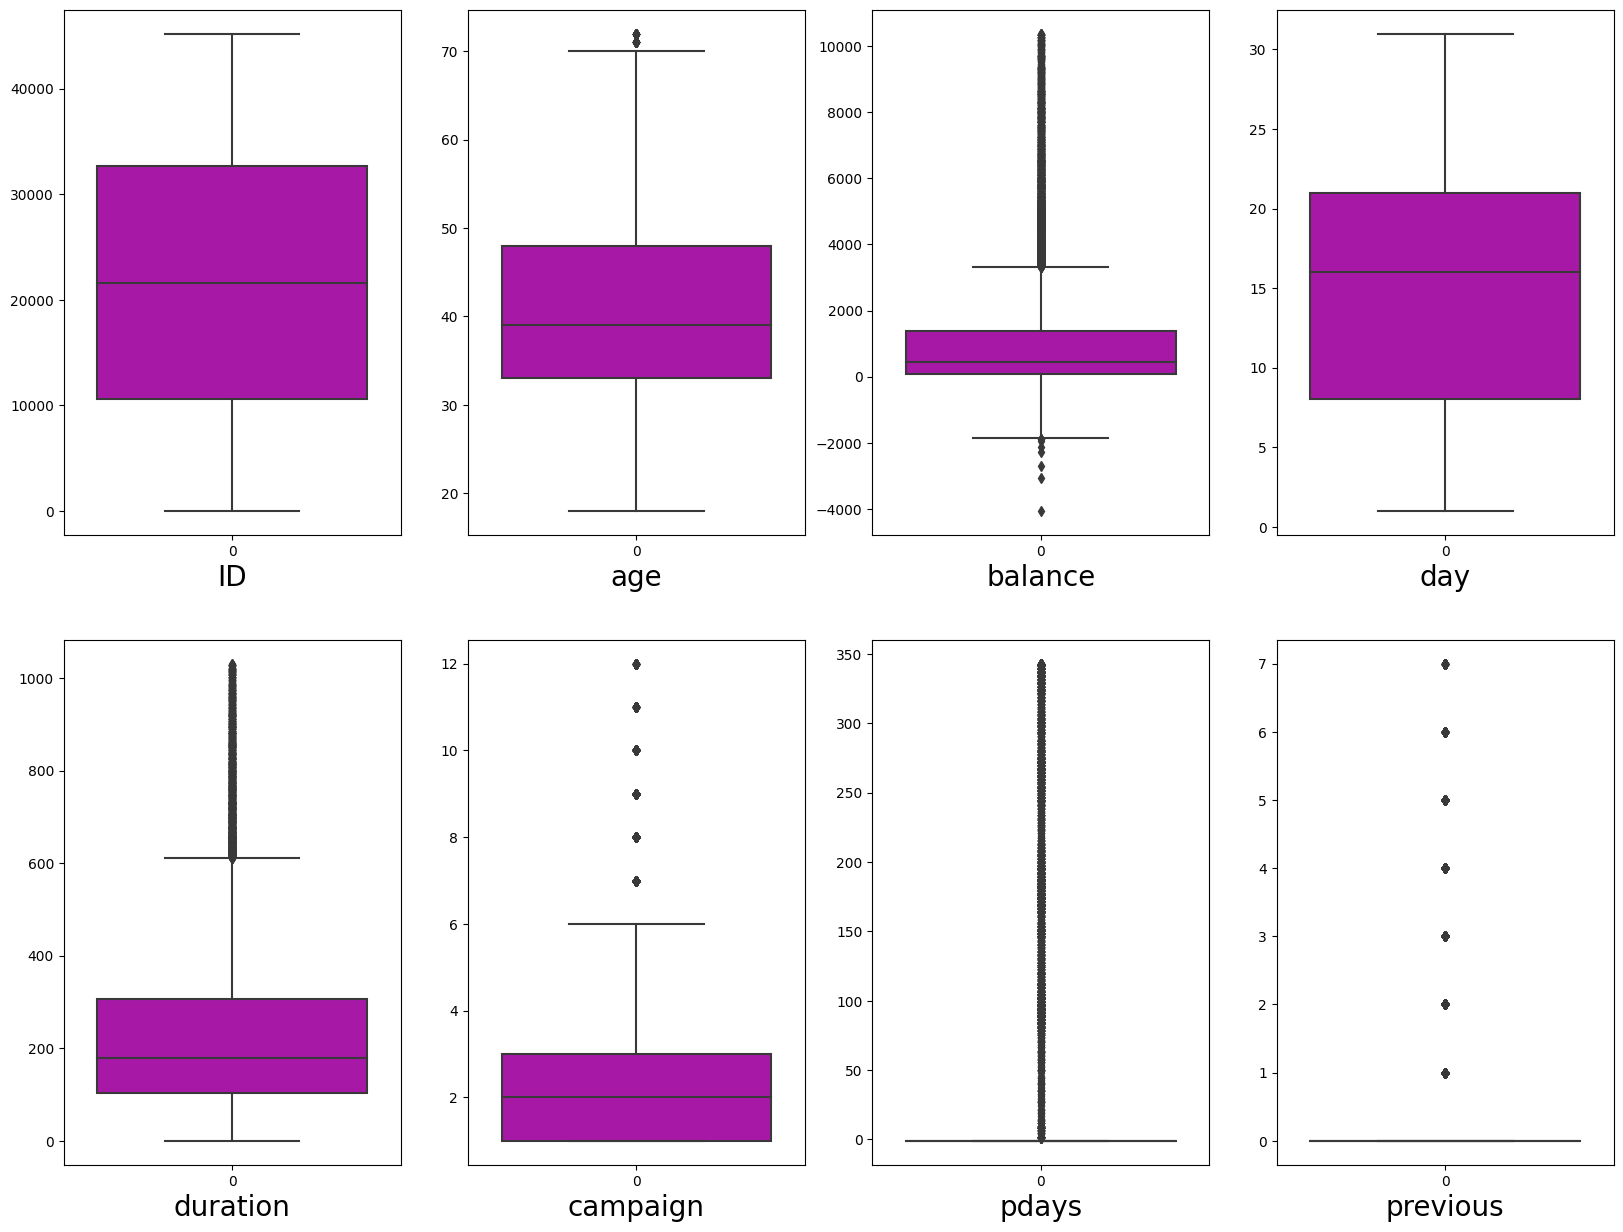

In [132]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(train[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

- The boxplots provide a visual summary of the numerical columns' distributions, highlighting the median, quartiles for each attribute after removing the outliers

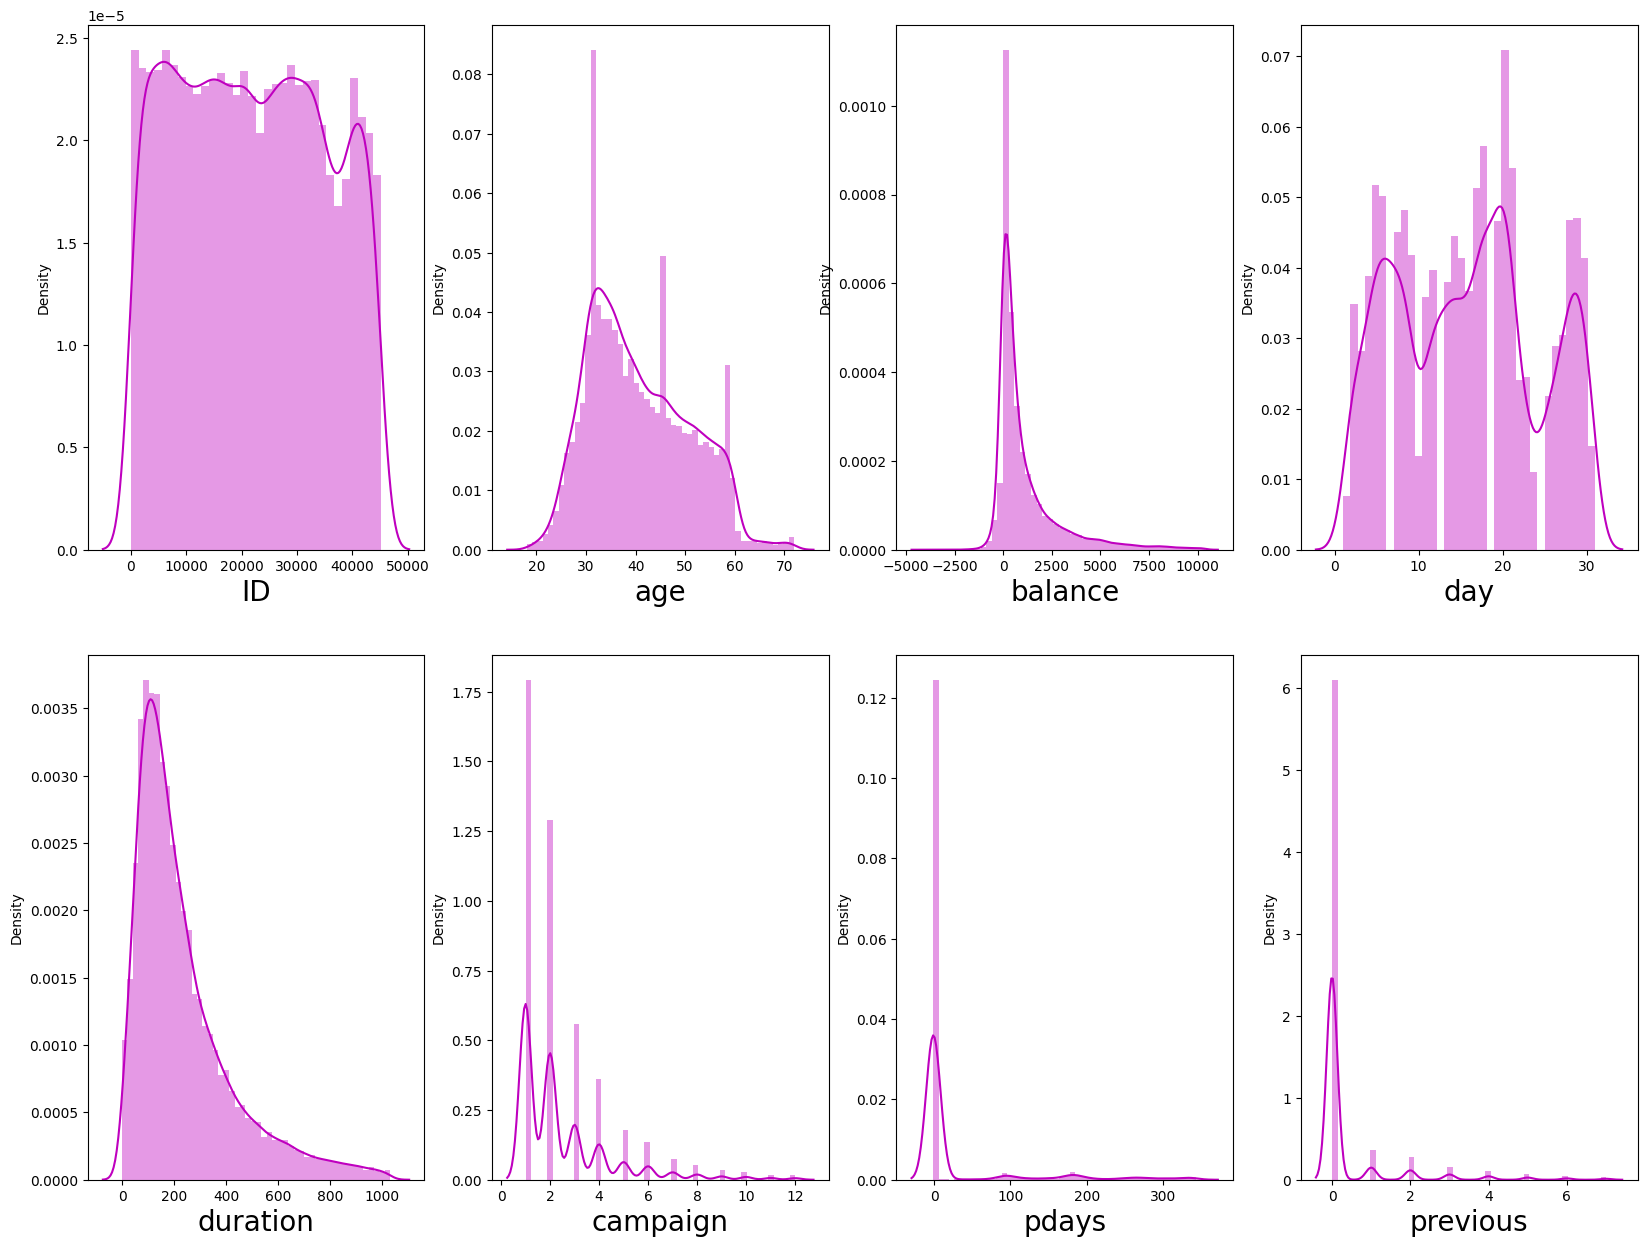

In [133]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(train[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

- The visualizations above display the distributions of the numerical columns in the dataset. Each subplot corresponds to a different numerical attribute, showing its distribution after removal of outliers

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27702 entries, 0 to 31644
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          27702 non-null  int64  
 1   age         27702 non-null  int64  
 2   job         27702 non-null  float64
 3   marital     27702 non-null  float64
 4   education   27702 non-null  float64
 5   default     27702 non-null  float64
 6   balance     27702 non-null  int64  
 7   housing     27702 non-null  float64
 8   loan        27702 non-null  float64
 9   contact     27702 non-null  float64
 10  day         27702 non-null  int64  
 11  month       27702 non-null  float64
 12  duration    27702 non-null  int64  
 13  campaign    27702 non-null  int64  
 14  pdays       27702 non-null  int64  
 15  previous    27702 non-null  int64  
 16  poutcome    27702 non-null  float64
 17  subscribed  27702 non-null  float64
dtypes: float64(10), int64(8)
memory usage: 5.0 MB


- The object datatype is cinverted into float datatype and int datatype

In [135]:
train.describe()

ID           age           job       marital     education  \
count  27702.000000  27702.000000  27702.000000  27702.000000  27702.000000   
mean   21851.907768     40.655332      4.347845      1.168977      1.225435   
std    12948.077427     10.086151      3.290492      0.604545      0.746656   
min        2.000000     18.000000      0.000000      0.000000      0.000000   
25%    10596.250000     33.000000      1.000000      1.000000      1.000000   
50%    21561.500000     39.000000      4.000000      1.000000      1.000000   
75%    32649.500000     48.000000      7.000000      2.000000      2.000000   
max    45210.000000     72.000000     11.000000      2.000000      3.000000   

       default       balance       housing          loan       contact  \
count  27702.0  27702.000000  27702.000000  27702.000000  27702.000000   
mean       0.0   1104.652805      0.553245      0.162660      0.666739   
std        0.0   1719.092264      0.497166      0.369062      0.911034   
min        0.0  -4057.000000      0.000000      0.000000      0.000000   
25%        0.0     79.000000      0.000000      0.000000      0.000000   
50%        0.0    449.000000      1.000000      0.000000      0.000000   
75%        0.0   1378.000000      1.000000      0.000000      2.000000   
max        0.0  10378.000000      1.000000      1.000000      2.000000   

                day         month      duration      campaign         pdays  \
count  27702.000000  27702.000000  27702.000000  27702.000000  27702.000000   
mean      15.833550      5.485236    236.020901      2.451159     26.177749   
std        8.378978      2.997065    190.318474      1.931439     73.591808   
min        1.000000      0.000000      0.000000      1.000000     -1.000000   
25%        8.000000      3.000000    104.000000      1.000000     -1.000000   
50%       16.000000      6.000000    178.000000      2.000000     -1.000000   
75%       21.000000      8.000000    307.000000      3.000000     -1.000000   
max       31.000000     11.000000   1031.000000     12.000000    343.000000   

           previous      poutcome    subscribed  
count  27702.000000  27702.000000  27702.000000  
mean       0.359938      2.655260      0.102411  
std        1.062945      0.891211      0.303194  
min        0.000000      0.000000      0.000000  
25%        0.000000      3.000000      0.000000  
50%        0.000000      3.000000      0.000000  
75%        0.000000      3.000000      0.000000  
max        7.000000      3.000000      1.000000

- The descriptive statistics for the dataset, after removing outliers from the columns, have been generated. This summary includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each column in the dataset

### Correlation between target variable and independent variables

In [136]:
corr = train.corr()
corr

ID       age       job   marital  education  default  \
ID          1.000000 -0.034826  0.069107  0.100864   0.117090      NaN   
age        -0.034826  1.000000 -0.029708 -0.411500  -0.101137      NaN   
job         0.069107 -0.029708  1.000000  0.067903   0.171453      NaN   
marital     0.100864 -0.411500  0.067903  1.000000   0.112904      NaN   
education   0.117090 -0.101137  0.171453  0.112904   1.000000      NaN   
default          NaN       NaN       NaN       NaN        NaN      NaN   
balance     0.095358  0.092491  0.023911  0.010623   0.054065      NaN   
housing    -0.201404 -0.155174 -0.124393 -0.027354  -0.098903      NaN   
loan       -0.076578  0.005626 -0.036813 -0.045208  -0.047792      NaN   
contact    -0.735832  0.031539 -0.083714 -0.042670  -0.121997      NaN   
day        -0.051031 -0.009837  0.020835 -0.008836   0.016892      NaN   
month      -0.205691 -0.040571 -0.086692 -0.002399  -0.056547      NaN   
duration    0.014190 -0.026867 -0.001545  0.016289   0.000834      NaN   
campaign   -0.088195  0.035362  0.004179 -0.022133  -0.007322      NaN   
pdays       0.381436 -0.012544  0.000743  0.015470   0.022427      NaN   
previous    0.375360  0.005915  0.012082  0.020063   0.041537      NaN   
poutcome   -0.388077  0.002459 -0.010822 -0.016702  -0.038957      NaN   
subscribed  0.313625 -0.006955  0.037493  0.057039   0.075975      NaN   

             balance   housing      loan   contact       day     month  \
ID          0.095358 -0.201404 -0.076578 -0.735832 -0.051031 -0.205691   
age         0.092491 -0.155174  0.005626  0.031539 -0.009837 -0.040571   
job         0.023911 -0.124393 -0.036813 -0.083714  0.020835 -0.086692   
marital     0.010623 -0.027354 -0.045208 -0.042670 -0.008836 -0.002399   
education   0.054065 -0.098903 -0.047792 -0.121997  0.016892 -0.056547   
default          NaN       NaN       NaN       NaN       NaN       NaN   
balance     1.000000 -0.056846 -0.094689 -0.037432  0.009072  0.031619   
housing    -0.056846  1.000000  0.037397  0.212211 -0.014238  0.270966   
loan       -0.094689  0.037397  1.000000 -0.011523  0.011873  0.027400   
contact    -0.037432  0.212211 -0.011523  1.000000 -0.026637  0.391241   
day         0.009072 -0.014238  0.011873 -0.026637  1.000000  0.015411   
month       0.031619  0.270966  0.027400  0.391241  0.015411  1.000000   
duration    0.031839  0.011764 -0.009811 -0.024311 -0.027522  0.009576   
campaign   -0.014298 -0.040694 -0.001363  0.004064  0.131536 -0.118449   
pdays       0.036529  0.082356 -0.006075 -0.242908 -0.060881 -0.056451   
previous    0.048438  0.013224 -0.015265 -0.218268 -0.052142 -0.008751   
poutcome   -0.055009 -0.056666  0.000154  0.252827  0.049694  0.023936   
subscribed  0.071102 -0.148855 -0.074674 -0.158600 -0.029241 -0.021755   

            duration  campaign     pdays  previous  poutcome  subscribed  
ID          0.014190 -0.088195  0.381436  0.375360 -0.388077    0.313625  
age        -0.026867  0.035362 -0.012544  0.005915  0.002459   -0.006955  
job        -0.001545  0.004179  0.000743  0.012082 -0.010822    0.037493  
marital     0.016289 -0.022133  0.015470  0.020063 -0.016702    0.057039  
education   0.000834 -0.007322  0.022427  0.041537 -0.038957    0.075975  
default          NaN       NaN       NaN       NaN       NaN         NaN  
balance     0.031839 -0.014298  0.036529  0.048438 -0.055009    0.071102  
housing     0.011764 -0.040694  0.082356  0.013224 -0.056666   -0.148855  
loan       -0.009811 -0.001363 -0.006075 -0.015265  0.000154   -0.074674  
contact    -0.024311  0.004064 -0.242908 -0.218268  0.252827   -0.158600  
day        -0.027522  0.131536 -0.060881 -0.052142  0.049694   -0.029241  
month       0.009576 -0.118449 -0.056451 -0.008751  0.023936   -0.021755  
duration    1.000000 -0.070899  0.014558  0.016109  0.001789    0.353512  
campaign   -0.070899  1.000000 -0.086313 -0.064840  0.098099   -0.075759  
pdays       0.014558 -0.086313  1.000000  0.715641 -0.879651    0.112226  
prev

- The correlation matrix has been calculated for the numerical features in the dataset. This matrix helps to understand the relationship between different variables. 
- A higher positive value indicates a strong positive correlation, while a higher negative value indicates a strong negative correlation between the variables.
- Default has NaN values indicating it has no variation, i.e., it has a constant value for all samples in the dataset. It indicates that there is no variability in that specific variable, 

In [137]:
train.drop(columns = ['default'],axis=1, inplace=True)

- As Default has no variation, lets drop the column

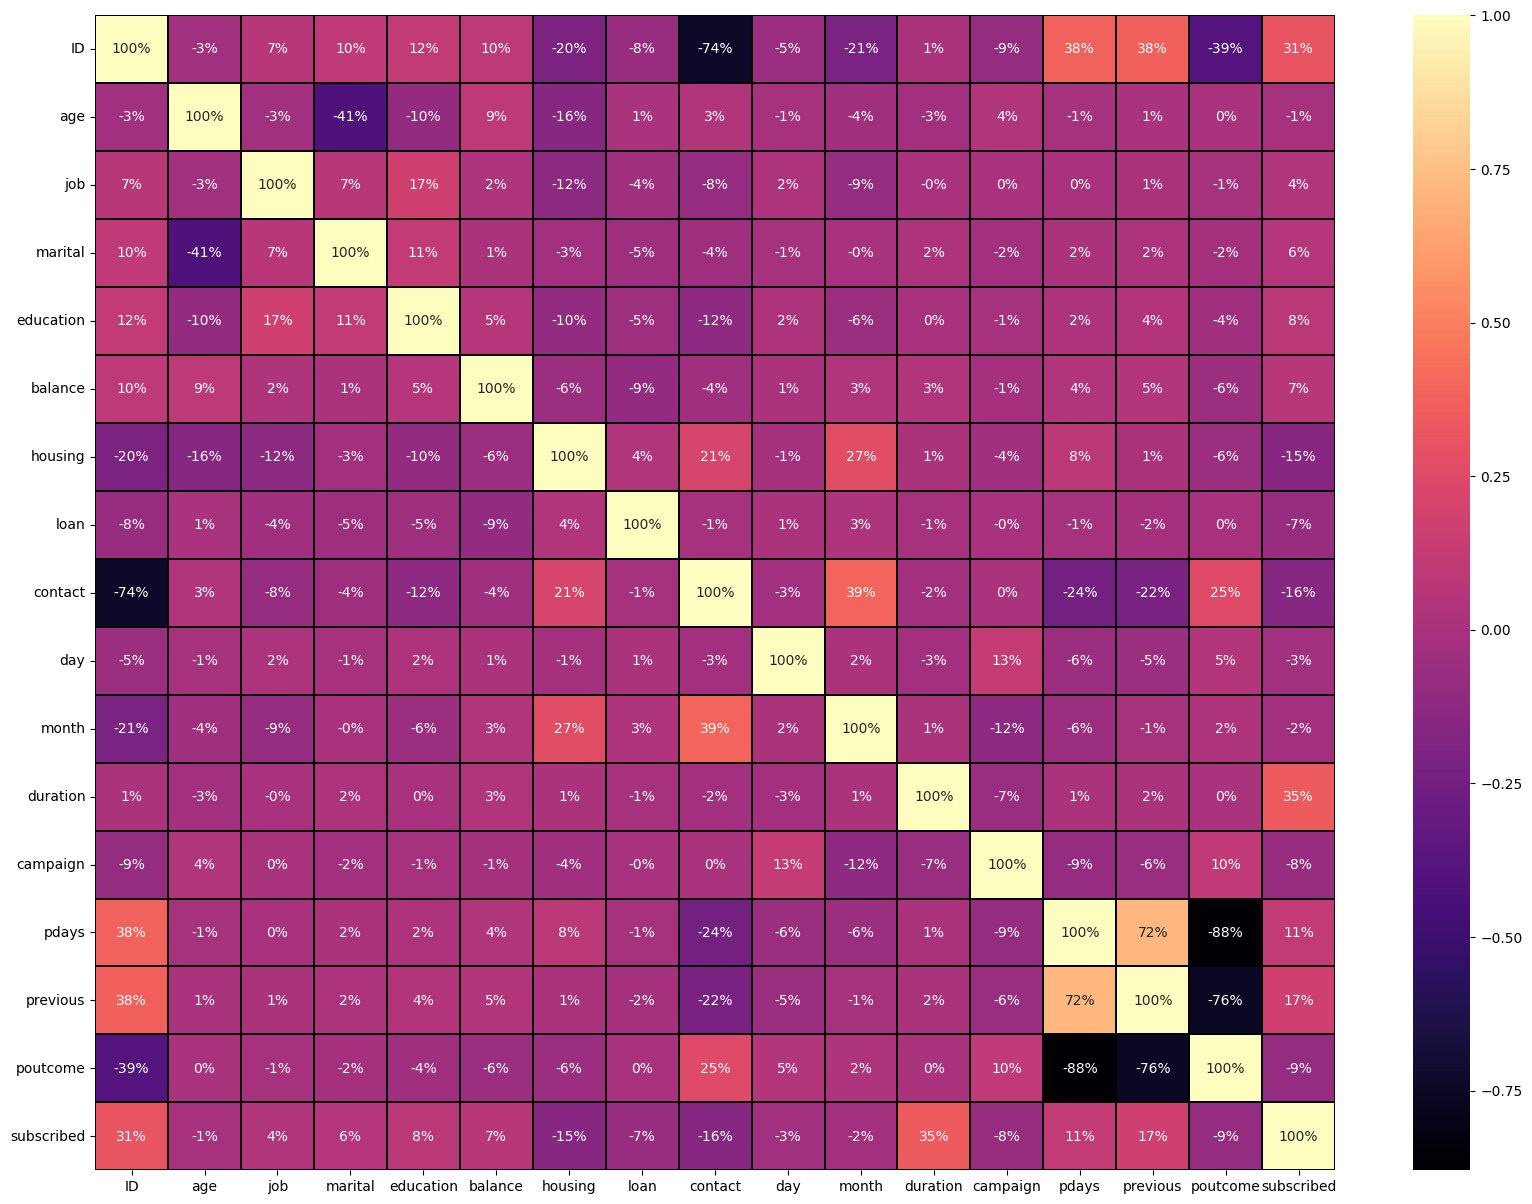

In [138]:
plt.figure(figsize = (20,15))
sns.heatmap(train.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'magma')
plt.yticks(rotation=0)
plt.show()

- The heatmap above visualizes the correlation matrix of the dataset.
- Darker colors indicate stronger correlations ie pdays and poutcome is negatively and strong related and poutcome and previous are also negavely and strongly related to each other
- The annotations on the heatmap provide the exact correlation percentages between the variables.
- This visualization can help identify which features are most related to each other.


In [139]:
corr['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.353512
ID            0.313625
previous      0.172710
pdays         0.112226
education     0.075975
balance       0.071102
marital       0.057039
job           0.037493
age          -0.006955
month        -0.021755
day          -0.029241
loan         -0.074674
campaign     -0.075759
poutcome     -0.089508
housing      -0.148855
contact      -0.158600
default            NaN
Name: subscribed, dtype: float64

- It identify which features have the highest positive correlation with the target variable at the top. 
- Positive values indicate a positive correlation, meaning as the feature increases, as the target variable increases.
- Features with higher positive correlations may be more influence in predicting the target variable.

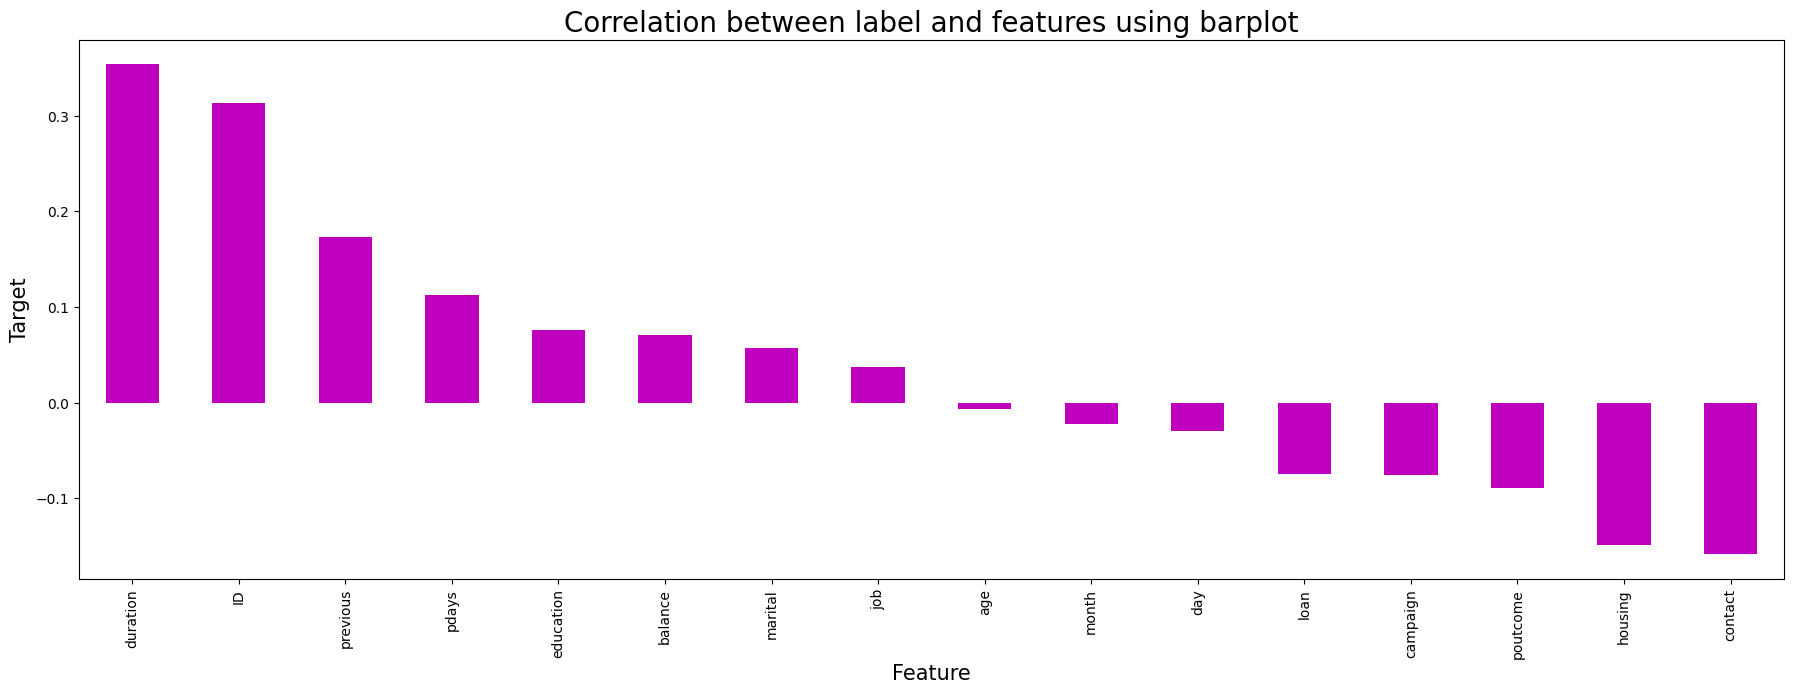

In [140]:
plt.figure(figsize = (22,7))
train.corr()['subscribed'].sort_values(ascending = False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

- The bar plot above displays the correlation of each feature with the 'subscribed' status. 
- Features that have a higher bar have a stronger positive correlation with the likelihood of a client subscribing to a term deposit, while features with lower bars have a less positive or negative correlation. 
- This visualization identifies features that would be a good predictors for the subscription 

### Segragating target and independent variables

In [141]:
x=train.drop(columns=['subscribed'],axis=1)
y=train['subscribed']

### Standardizing the data

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

ID       age       job   marital  education   balance   housing  \
0      0.328865  1.521388 -1.321359 -0.279516   2.376728  0.481860 -1.112818   
1      1.446117 -0.957303  2.021666 -0.279516  -0.301932 -0.640846 -1.112818   
2     -0.504478 -1.353894  0.806020 -0.279516  -0.301932 -0.124285  0.898619   
3      1.707627  1.620535 -0.105714 -1.933682   1.037398  1.269499 -1.112818   
4      0.617098 -0.957303  1.413843 -0.279516  -0.301932 -0.573367  0.898619   
...         ...       ...       ...       ...        ...       ...       ...   
27697 -0.752473  0.232468 -0.105714  1.374650  -0.301932  1.083933 -1.112818   
27698 -0.955828 -0.362418  1.413843  1.374650   1.037398  0.118871 -1.112818   
27699  1.130002 -1.155599 -0.105714  1.374650   1.037398 -0.642591  0.898619   
27700  1.415378  1.223945 -0.105714 -1.933682   1.037398 -0.421540 -1.112818   
27701 -0.165426 -0.858156 -0.105714  1.374650   1.037398 -0.461096 -1.112818   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.440747  0.365812  0.377911  1.172756 -1.008963 -0.233591 -0.369311   
1     -0.440747 -0.731862  0.497259 -0.161907 -0.762004 -0.233591 -0.369311   
2     -0.440747 -0.731862  0.258562 -0.161907  0.020908 -0.751349 -0.369311   
3     -0.440747 -0.731862  0.735956  0.171759  3.315445 -0.751349  0.785730   
4     -0.440747 -0.731862 -1.412316 -0.829238  0.756530 -0.751349 -0.369311   
...         ...       ...       ...       ...       ...       ...       ...   
27697 -0.440747  1.463486  0.497259  0.171759 -1.082526  0.801925 -0.369311   
27698 -0.440747  1.463486 -1.173619  0.171759  1.082306 -0.233591 -0.369311   
27699 -0.440747 -0.731862 -0.457528  0.839091 -0.630643 -0.233591 -0.369311   
27700  2.268877 -0.731862 -1.292967  0.171759  1.061288 -0.233591 -0.369311   
27701 -0.440747 -0.731862 -1.054271 -1.496570 -1.045744  0.284167 -0.369311   

       previous  poutcome  
0     -0.338629  0.386829  
1     -0.338629  0.386829  
2     -0.338629  0.386829  
3      2.483768 -0.735259  
4     -0.338629  0.386829  
...         ...       ...  
27697 -0.338629  0.386829  
27698 -0.338629  0.386829  
27699 -0.338629  0.386829  
27700 -0.338629  0.386829  
27701 -0.338629  0.386829  

[27702 rows x 16 columns]

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values   Features
0     2.680773         ID
1     1.273740        age
2     1.050081        job
3     1.238145    marital
4     1.067857  education
5     1.038629    balance
6     1.199666    housing
7     1.031269       loan
8     2.611820    contact
9     1.033262        day
10    1.304337      month
11    1.010379   duration
12    1.057101   campaign
13    4.655274      pdays
14    2.481360   previous
15    5.298277   poutcome

- The Variance Inflation Factor (VIF) values for the numerical features in the dataset have been calculated. 
- VIF values provide an indication of the amount of multicollinearity in the data. 
- VIF value above 5 suggests a problematic level of multicollinearity, where the feature may be linearly predictable from the other features using VIF value
- It's like having too much overlapping information among features, making it harder to trace out their independent effects.

### Balancing the target varaible

In [144]:
y.value_counts()

subscribed
0.0    24865
1.0     2837
Name: count, dtype: int64

- The data is imbalanced so need to fix it

### SMOTE - over_sampling method

In [145]:
import imblearn
from imblearn.over_sampling import SMOTE  
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

###### Target variable is balanced  both classes are now 24865

In [146]:
y1.value_counts()

subscribed
0.0    24865
1.0    24865
Name: count, dtype: int64

### Modelling

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [148]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x1,y1,test_size =0.30, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9587773979489241 at random_state 166


In [149]:
x_train, x_test,y_train,y_test = train_test_split(x1,y1,test_size =0.30, random_state=maxRS)

### from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Random Forest Classifier

In [150]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()                    
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9587773979489241
[[7032  497]
 [ 118 7272]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96      7529
         1.0       0.94      0.98      0.96      7390

    accuracy                           0.96     14919
   macro avg       0.96      0.96      0.96     14919
weighted avg       0.96      0.96      0.96     14919



### LogisticRegression

In [151]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8522689188283397
[[6267 1262]
 [ 942 6448]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      7529
         1.0       0.84      0.87      0.85      7390

    accuracy                           0.85     14919
   macro avg       0.85      0.85      0.85     14919
weighted avg       0.85      0.85      0.85     14919



### GradientBoostingClassifier

In [152]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9275420604598164
[[6781  748]
 [ 333 7057]]
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      7529
         1.0       0.90      0.95      0.93      7390

    accuracy                           0.93     14919
   macro avg       0.93      0.93      0.93     14919
weighted avg       0.93      0.93      0.93     14919



### AdaBoostClassifier

In [153]:
# Checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.9038139285474898
[[6772  757]
 [ 678 6712]]
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      7529
         1.0       0.90      0.91      0.90      7390

    accuracy                           0.90     14919
   macro avg       0.90      0.90      0.90     14919
weighted avg       0.90      0.90      0.90     14919



###  BaggingClassifier

In [154]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9450365305985656
[[7037  492]
 [ 328 7062]]
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      7529
         1.0       0.93      0.96      0.95      7390

    accuracy                           0.95     14919
   macro avg       0.95      0.95      0.95     14919
weighted avg       0.95      0.95      0.95     14919



### SupportVectorclassifier

In [155]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9014008981835243
[[6408 1121]
 [ 350 7040]]
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      7529
         1.0       0.86      0.95      0.91      7390

    accuracy                           0.90     14919
   macro avg       0.91      0.90      0.90     14919
weighted avg       0.91      0.90      0.90     14919



### ExtraTreesClassifier

In [156]:
# Checking accuracy for ExtraTreesClassifier
ET = BaggingClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9423553857497151
[[7009  520]
 [ 340 7050]]
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      7529
         1.0       0.93      0.95      0.94      7390

    accuracy                           0.94     14919
   macro avg       0.94      0.94      0.94     14919
weighted avg       0.94      0.94      0.94     14919



### Cross Validation Score

In [157]:
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [158]:
# Checking cv score for RandomForestClassifier
score1 = cross_val_score(RFC,x1,y1)
print(score1)
print('RandomForestClassifier:',score1.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score1.mean())

[0.92398954 0.95978283 0.96219586 0.9658154  0.96098934]
RandomForestClassifier: 0.9545545948119847
Difference between Accuracy score and cross validation is:  0.004222803136939457


### LogisticRegression

In [159]:
# Checking cv score for LogisticRegression
score2 = cross_val_score(LR,x1,y1)
print(score2)
print('LogisticRegression:',score2.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score2.mean())

[0.8428514  0.84858234 0.84727529 0.85702795 0.84506334]
LogisticRegression: 0.8481600643474764
Difference between Accuracy score and cross validation is:  0.004108854480863289


### GradientBoosingClassifier

In [160]:
# Checking cv score for GradientBoosingClassifier
score3 = cross_val_score(GB,x1,y1)
print(score3)
print('GradientBoosingClassifier:',score3.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score3.mean())

[0.88015283 0.92539714 0.93002212 0.93504927 0.92680475]
GradientBoosingClassifier: 0.9194852201890207
Difference between Accuracy score and cross validation is:  0.008056840270795673


### SupportVectorClassifier

In [161]:
# Checking cv score for SupportVectorClassifier
score4 = cross_val_score(svc,x1,y1)
print(score4)
print('supportvectorclassifier:',score4.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score4.mean())

[0.89573698 0.90418259 0.90227227 0.90649507 0.90227227]
supportvectorclassifier: 0.9021918359139353
Difference between Accuracy score and cross validation is:  -0.0007909377304109455


### AdaBoostClassifier

In [162]:
# Checking cv score for AdaBoostClassifier
score5 = cross_val_score(ABC,x1,y1)
print(score5)
print('AdaBoostClassifier:',score5.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score5.mean())

[0.84958777 0.90920973 0.90689725 0.91333199 0.90941082]
AdaBoostClassifier: 0.8976875125678665
Difference between Accuracy score and cross validation is:  0.0061264159796232676


### BaggingClassifier

In [163]:
# Checking cv score for BaggingClassifier
score6 = cross_val_score(BC,x1,y1)
print(score6)
print('BaggingClassifier:',score6.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score6.mean())

[0.89121255 0.95043233 0.95395134 0.95817414 0.95385079]
BaggingClassifier: 0.9415242308465714
Difference between Accuracy score and cross validation is:  0.0035122997519941856


### ExtraTreesClassifier

In [164]:
# Checking cv score for ExtraTreesClassifier
score7 = cross_val_score(ET,x1,y1)
print(score7)
print('ExtraTreesClassifier:',score7.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score7.mean())

[0.89251961 0.9487231  0.95254374 0.95636437 0.95415242]
ExtraTreesClassifier: 0.9408606474964809
Difference between Accuracy score and cross validation is:  0.0014947382532342068


##### The best model is Random Forest Classifier with accuracy of 95.455 and model generalization is 0.00422

### Hyperparameter Tuning

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [167]:
# RandomForestClassifier

params = {'n_estimators':[13,15,17,19,21],             
          'criterion':['entropy','gini'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6],
          'n_jobs': [-2,-1,1],
          'random_state':[10,50,1000]}

In [168]:
GCV = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15, 17, 19, 21],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [169]:
print('best params :', GCV.best_params_) 

best params : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 17, 'n_jobs': -2, 'random_state': 10}


In [170]:
Final_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Training

In [171]:
Final_model.fit(x_train,y_train)


RandomForestClassifier(max_features=2)

### Encoding Test data

In [172]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes == 'object':
        test[i] = oe.fit_transform(test[i].values.reshape(-1,1))
        
test

ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32  7.0      1.0        1.0      0.0      118      1.0   0.0   
1      40403   78  5.0      0.0        0.0      0.0     2787      0.0   0.0   
2       3709   31  6.0      2.0        2.0      0.0      144      1.0   0.0   
3      37422   57  7.0      2.0        0.0      0.0     3777      1.0   0.0   
4      12527   45  1.0      0.0        1.0      0.0     -705      0.0   1.0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39  4.0      1.0        2.0      0.0       45      0.0   0.0   
13560  11743   54  1.0      1.0        0.0      0.0     2281      1.0   0.0   
13561  28292   35  5.0      1.0        0.0      0.0      285      1.0   0.0   
13562  45163   29  0.0      2.0        1.0      0.0      464      0.0   0.0   
13563  34839   29  0.0      1.0        1.0      0.0        2      1.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  
0          0.0   15    8.0        20         6     -1         0       3.0  
1          1.0    1    5.0       372         1     -1         0       3.0  
2          2.0   16    8.0       676         1     -1         0       3.0  
3          1.0   13    8.0        65         2     -1         0       3.0  
4          2.0    3    5.0       111         1     -1         0       3.0  
...        ...  ...    ...       ...       ...    ...       ...       ...  
13559      0.0   28    1.0       148         4     -1         0       3.0  
13560      2.0   20    6.0       158         1     -1         0       3.0  
13561      0.0   29    4.0       136         1     -1         0       3.0  
13562      0.0    9    9.0       208         2     91         3       2.0  
13563      0.0    6    8.0       339         1    362         1       0.0  

[13564 rows x 17 columns]

### Test data in prediction

In [173]:
pred = Final_model.predict(x_test)

In [174]:
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 96.26%


In [175]:
report = classification_report(y_test, pred)
matrix = confusion_matrix(y_test, pred)


print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      7529
         1.0       0.94      0.98      0.96      7390

    accuracy                           0.96     14919
   macro avg       0.96      0.96      0.96     14919
weighted avg       0.96      0.96      0.96     14919

Confusion Matrix:
 [[7091  438]
 [ 120 7270]]


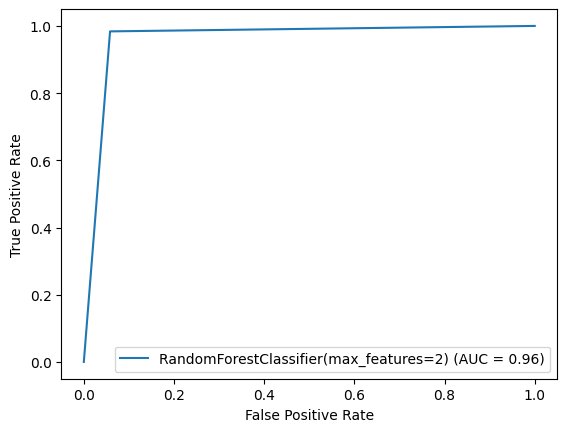

In [176]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc,estimator_name = Final_model)
display.plot()

- The Receiver Operating Characteristic (ROC) curve has been plotted for the RandomForestClassifier model. The curve illustrates the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various threshold settings.
- The area under the curve (AUC) provides a single measure of the model's performance across all classification thresholds.
- The AUC (Area Under the Curve) value of 1.00 indicates that the model has perfect classification ability, between positive and negative classes. 
- This result and suggests that the model's predictions are highly accurate.

In [177]:
import pickle
with open('Term_deposit_Analysis.pkl', 'wb') as file:
    pickle.dump(Final_model, file)

In [178]:
with open('Term_deposit_Analysis.pkl', 'rb') as file:
    model = pickle.load(file)

prediction = model.predict(x_test)

In [179]:
rfc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Actual'] = rfc
df

Predicted  Actual
0            1.0     1.0
1            0.0     0.0
2            0.0     0.0
3            0.0     0.0
4            0.0     0.0
...          ...     ...
14914        0.0     0.0
14915        0.0     0.0
14916        1.0     1.0
14917        0.0     0.0
14918        1.0     1.0

[14919 rows x 2 columns]